<a href="https://colab.research.google.com/github/fakhrulnurmulyana/ML_Capstone/blob/main/HukumQ(work_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prepare dataset
import json
import pandas as pd

In [2]:
%%writefile content.json
{
  "intents": [
    {
      "tag": 0,
      "patterns": [
        "Halo",
        "hello",
        "helo",
        "hallo",
        "Hi",
        "Selamat Pagi",
        "Selamat Siang",
        "Selamat Malam",
        "Salam",
        "Assalamualaikum",
        "Mari kita berbicara",
        "Salam kenal",
        "Hai, kawan!",
        "Hai, sobat!",
        "Salam sejahtera",
        "p",
        "oi",
        "oy",
        "spada",
        "uy",
        "."
      ],
      "responses": [
        "Halo",
        "Selamat datang",
        "Apa yang bisa saya bantu?",
        "Ada yang perlu diobrolkan?",
        "Waalaikumusslaam",
        "Mari kita berbicara",
        "Salam kenal",
        "Hai",
        "Hai, kawan!",
        "Hai, sobat!",
        "Halo!",
        "Apa yang bisa saya bantu untukmu?"
      ]
    },
    {
      "tag": 1,
      "patterns": [
        "terima kasih",
        "terimakasih",
        "terimakasih banyak",
        "terima kasih",
        "makasih",
        "dadah",
        "Dah",
        "Daah",
        "adios",
        "okay",
        "oke",
        "Selamat Tinggal",
        "Semoga harimu penuh berkah.",
        "Sukses untukmu!",
        "Hingga kita kembali bertemu.",
        "Terima kasih atas waktu dan perhatiannya.",
        "bye"
      ],
      "responses": [
        "Senang bisa membantu!",
        "Semoga kita bisa berinteraksi lagi di lain waktu.",
        "Sampai jumpa, semoga harimu menyenangkan!",
        "Adios! Hasta luego.",
        "semoga bermanfaat.",
        "yoi",
        "bye",
        "dadah",
        "bye, hiks"
      ]
    },
    {
      "tag": 2,
      "patterns": [
        "apa itu HukumQ ?",
        "Apa yang dimaksud dengan HukumQ?",
        "Bisakah Anda menjelaskan apa itu HukumQ?",
        "HukumQ itu apa?",
        "Apa definisi HukumQ?",
        "Apa HukumQ?",
        "HukumQ",
        "HukumQ apa?",
        "HukumQ arti",
        "Arti HukumQ",
        "Apa HukumQ",
        "HukumQ itu seperti apa?",
        "Tolong jelaskan istilah HukumQ.",
        "Apakah Anda bisa memberikan definisi singkat tentang HukumQ?",
        "Jelaskan HukumQ",
        "Jelaskan apa itu HukumQ",
        "apa itu hukum Q",
        "hukum Q"
      ],
      "responses": [
        "HukumQ adalah aplikasi yang memberikan jawaban terkait pertanyaan hukum tertulis di Indonesia.",
        "HukumQ adalah aplikasi yang fokus memberikan jawaban terkait pertanyaan hukum tertulis di Indonesia",
        "Hmm, terdengar seperti nama saya. Kalo benar berarti itu adalah aplikasi chatbot yang dibuat oleh peserta Kampus Merdeka Bangkit 2023 batch 2. aplikasi ini dibuat agar bisa menjelaskan hukum tertulis di indonesia.",
        "HukumQ adalah aplikasi yang bisa menjawab pertanyaan tentang hukum tertulis di indonesia. Belum semua hukum tertulis sih, hanya sebagian pada bidang yang kecil, karena saya masih dalam versi pengembangan."
      ]
    },
    {
      "tag": 3,
      "patterns": [
        "Kamu siapa ?",
        "Bisa kenalan nggak?",
        "Identitas kamu apa?",
        "Boleh tahu siapa kamu?",
        "Kamu punya nama?",
        "Sebutkan siapa diri kamu.",
        "Siapakah yang sedang berbicara?",
        "Apakah kamu bisa memperkenalkan diri?",
        "Nama panggilan kamu apa?",
        "Siapa yang,sedang online di sini?",
        "Tolong perkenalkan dirimu.",
        "Nama?",
        "siapa?",
        "Nama mu",
        "NamaMu",
        "apa nama apikasi ini?"
      ],
      "responses": [
        "Saya adalah HukumQ",
        "aplikasi yang dibangun untuk membantu memahami hukum tertulis tertulis di indonesia, HukumQ",
        "Saya merupakan HukumQ",
        "HukumQ, platform untuk menjawab pertanyaan seputar hukum di Indonesia.",
        "HukumQ di sini",
        "HukumQ hadir untuk mempermudah pemahaman hukum tertulis di Indonesia.",
        "Saya adalah HukumQ, solusi untuk pertanyaan-pertanyaan hukum Anda.",
        "HukumQ hadir sebagai panduan hukum online di Indonesia.",
        "Saya adalah HukumQ, platform pintar untuk memahami peraturan hukum di Indonesia.",
        "HukumQ di sini untuk menjawab pertanyaan hukum Anda",
        "Saya adalah HukumQ, sahabat untuk menjelaskan hukum tertulis Indonesia.",
        "HukumQ",
        "Chatbot HukumQ",
        "Sebenarnya nama saya adalah HukumQ, tapi mungkin dalam konteks chat ini lebih tepat HukumMU deh"
      ]
    },
    {
      "tag": 4,
      "patterns": [
        "bagaimana kabarmu?",
        "apa kabar",
        "apakah kamu baik?",
        "kabarmu bagaimana",
        "kabarmu apa"
      ],
      "responses": [
        "kabar saya baik, bagaimana dengan mu?",
        "kabar saya baik, ada yang bisa saya bantu?"
      ]
    },
    {
      "tag": 5,
      "patterns": [
        "saya baik",
        "alhamdulillah",
        "saya luar biasa",
        "saya gembira",
        "baik juga"
      ],
      "responses": [
        "syukur lah, ada yang bisa saya bantu?"
      ]
    },
    {
      "tag": 6,
      "patterns": [
        "ada",
        "saya memerlukan bantuan anda",
        "saya perlu bantuan",
        "bisakah saya minta tolong",
        "tolong bantu saya"
      ],
      "responses": [
        "tentu saya akan membantu semampu saya, silahkan sebutkan pertanyaan anda"
      ]
    },
    {
      "tag": 7,
      "patterns": [
        "apa kemampuan hukumQ",
        "HukumQ bisa apa saja",
        "apa yang bisa dilakukan hukumQ",
        "dimana batas hukumQ",
        "HUKUMQ kekuatanya apa?",
        "apa kelebihan hukumQ"
      ],
      "responses": [
        "Saat ini saya (HukumQ), bisa menjawab penjelasan hukum tertulis tentang praperadilan di indonesia dan sebagian kecil tentang hukum tertulis di Indonesia"
      ]
    },
    {
      "tag": 8,
      "patterns": [
        "bagaimana cuaca saat ini",
        "cuaca saat ini bagaimana",
        "apakah sekarang hujan",
        "apakah hari ini cerah",
        "apa sekarang hujan",
        "bagaimana perkiraan cuaca saat ini?",
        "cuaca"
      ],
      "responses": [
        "Saya berharap bisa menjawab pertanyaan anda, tapi sayangnya saya tidak bisa menjawab anda. Karena saya tidak memmiliki akses langsung ke database cuaca secara realtime.",
        "Bencana besar!, saya tidak bisa menjawab pertanyaan itu karena saya hanya bisa menjawab pertanyaan tentang hukum tertulis di indonesia dan saat ini fokus ke praperadilan di indonesia."
      ]
    },
    {
      "tag": 9,
      "patterns": [
        "hukumk",
        "hukumku",
        "apa itu hukumku",
        "hukumk itu apa",
        "apa fungsi hukumku",
        "apa kelebihan hukumk"
      ],
      "responses": [
        "Aduh... sepertinya anda salah mengeja nama saya. Nama saya HukumQ pake 'Q",
        "HukumQ kali kak."
      ]
    },
    {
      "tag": 10,
      "patterns": [
        "lagi",
        "sebutkan lagi",
        "apa lagi",
        "teruskan",
        "lanjutkan",
        "lanjut"
      ],
      "responses": [
        "apa yang dilanjutkan kak?"
      ]
    },
    {
      "tag": 11,
      "patterns": [
        "yang tadi?",
        "yang di atas",
        "sebelumnya",
        "yang sebelumnya saya sebutkan",
        "pertanyaan sebelumnya",
        "lanjut"
      ],
      "responses": [
        "Maaf kak, kayaknya pertanyaan kakak kurang lengkap deh, saya kurang paham maksud kakak"
      ]
    },
    {
      "tag": 12,
      "patterns": [
        "apa itu hukum",
        "hukum",
        "pengertian hukum",
        "maksud hukum",
        "defenisi hukum"
      ],
      "responses": [
        "Hukum adalah undang-undang yang dibuat dan ditegakkan melalui lembaga sosial atau pemerintah untuk mengatur perilaku masyarakat."
      ]
    },
    {
      "tag": 13,
      "patterns": [
        "Apa itu Praperadilan?",
        "Definisi Praperadilan",
        "praperadilan",
        "pengertian praperadilan",
        "Apa yang dimaksud dengan praperadilan?",
        "Apa yang dapat diperiksa melalui praperadilan?"
      ],
      "responses": [
        "\nPraperadilan adalah proses hukum yang memberikan wewenang kepada pengadilan untuk memeriksa keabsahan suatu penangkapan, penahanan, penghentian penyidikan, atau penghentian penuntutan sebelum kasus itu diajukan ke pengadilan pidana.\nTujuan Praperadilan adalah melindungi hak asasi manusia dan memastikan bahwa tindakan penegak hukum sesuai dengan ketentuan hukum yang berlaku.",
        "\nPraperadilan adalah suatu proses hukum yang bertujuan untuk menguji keabsahan, keberlanjutan, atau kesesuaian suatu tindakan hukum yang dilakukan oleh penegak hukum sebelum perkara dibawa ke pengadilan. Praperadilan memberikan kesempatan kepada pihak yang dianggap menjadi korban tindakan hukum yang dianggap melanggar hak-haknya untuk mengajukan permohonan kepada pengadilan guna memeriksa dan menilai keabsahan atau keberlanjutan tindakan tersebut.\nTujuan dari praperadilan adalah melindungi hak-hak individu terhadap tindakan yang dianggap melanggar hak asasi manusia atau hukum lainnya sebelum masuk ke dalam proses pengadilan yang lebih lanjut. Praperadilan dapat diajukan terhadap berbagai tindakan hukum, seperti penangkapan, penahanan, penggeledahan, penyitaan, atau tindakan hukum lainnya yang dianggap merugikan hak-hak individu.\nProses praperadilan seringkali melibatkan pemeriksaan bukti-bukti dan argumen-argumen hukum untuk menentukan apakah tindakan hukum yang dilakukan oleh aparat hukum sesuai dengan ketentuan hukum yang berlaku. Jika praperadilan diterima, maka tindakan hukum tersebut dapat dinyatakan tidak sah atau harus dihentikan. Jika ditolak, perkara dapat melanjutkan ke proses pengadilan lebih lanjut. Praperadilan menjadi salah satu mekanisme penting dalam menjaga keadilan dan perlindungan hak asasi manusia dalam sistem hukum suatu negara.",
        "\nPraperadilan adalah proses hukum yang memberikan kesempatan pada seseorang untuk mengajukan permohonan kepada pengadilan jika dia merasa hak-haknya dilanggar oleh tindakan hukum, seperti penangkapan atau penyitaan. Ini memungkinkan pengadilan untuk memeriksa keabsahan tindakan tersebut sebelum masuk ke proses pengadilan lebih lanjut. Praperadilan bertujuan melindungi hak-hak individu dari tindakan hukum yang mungkin tidak sesuai dengan hukum. Jika diterima, tindakan tersebut dapat dinyatakan tidak sah. Jika ditolak, perkara akan melanjutkan ke proses pengadilan berikutnya. Praperadilan membantu menjaga keadilan dan hak asasi manusia dalam sistem hukum.",
        "\nPraperadilan adalah wewenang pengadilan negeri untuk memeriksa dan memutus menurut cara yang diatur dalam undang-undang ini, tentang: \n a.sah atau tidaknya suatu penangkapan dan atau penahanan atas permintaan tersangka atau keluarganya atau pihak lain atas kuasa tersangka;\n b.sah atau tidaknya penghentian penyidikan atau penghentian penuntutan atas permintaan demi tegaknya hukum dan keadilan;\n c.permintaan ganti kerugian atau rehabilitasi oleh tersangka atau keluarganya atau pihak lain atas kuasanya yang perkaranya tidak diajukan ke pengadilan."
      ]
    },
    {
      "tag": 14,
      "patterns": [
        "apa itu KUHAP?",
        "apa kepanjangan dari KUHAP",
        "KUHAP"
      ],
      "responses": [
        "KUHAP adalah Kitab Undang-undang Hukum Acara Pidana yang merupakan salah satu dari sumber hukum tertulis di indonesia"
      ]
    },
    {
      "tag": 15,
      "patterns": [
        "berapa jumlah pasal dalam KUHAP",
        "Jumlah Pasal KUHAP",
        "Pasal KUHAP",
        "berapa jumlah pasal dalam KUHP",
        "Jumlah Pasal KUHP",
        "Pasal KUHP"
      ],
      "responses": [
        "Jumlah pasal dalam KUHAP adalah __ dan __ ayat. Yaitu : \na."
      ]
    },
    {
      "tag": 16,
      "patterns": [
        "berapa jumlah pasal yang membahas praperadilan",
        "Pasal praperadilan",
        "jumlah pasal praperadilan",
        "apa saja pasal yang membahas tentang praperadilan?"
      ],
      "responses": [
        "Jumlah pasal tentang praperadilan adalah __ dan __ ayat. Yaitu : \na."
      ]
    },
    {
      "tag": 17,
      "patterns": [
        "apa beda praperadilan dan pengadilan?",
        "Bagaimana praperadilan berbeda dari persidangan?",
        "apa yang membedakan praperadilan dan pengadilan?"
      ],
      "responses": [
        "Perbedaan praperadilan dan peradilan terletak pada waktu pelaksanaannya. praperadilan dilaksanakan sebelum persidangan dimulai. Dimana praperadilan bertujuan untuk melindungi HAM warga negara indonesia dan dilakukan jika tersangka, terdakwa, atau pihak yang dirugikan terhadap proses penangkapan."
      ]
    },
    {
      "tag": 18,
      "patterns": [
        "apa saja yang bisa diajukan dalam praperadilan?",
        "praperadilan mengajukan",
        "pelanggaran yang bisa diajukan praperadilan"
      ],
      "responses": [
        "Yang bisa diajukan dalam praperadilan adalah, sah atau tidaknya suatu penangkapan atau penahanan diajukan oleh tersangka, keluarga, atau kuasanya kepada ketua pengadilan negeri dengan menyebutkan alasannya."
      ]
    },
    {
      "tag": 19,
      "patterns": [
        "Siapa yang berhak mengajukan Praperadilan?",
        "Proses pengajuan Praperadilan",
        "Tahapan pengajuan praperadilan",
        "Siapa yang dapat mengajukan Praperadilan?",
        "Bagaimana proses awal pengajuan Praperadilan dimulai?",
        "Apakah hanya tersangka yang dapat mengajukan Praperadilan?",
        "Ke mana permohonan Praperadilan diajukan?",
        "Apakah ada aturan tertentu terkait siapa yang dapat mengajukan Praperadilan?",
        "Bagaimana Praperadilan melibatkan pihak yang dirugikan?",
        "hak yang dilanggar",
        "dirugikan",
        "pihak yang dirugikan",
        "Siapa pun yang merasa hak-haknya dilanggar, termasuk tersangka, terdakwa, atau pihak yang dirugikan, dapat mengajukan Praperadilan. Proses pengajuan Praperadilan dimulai dengan mengajukan permohonan ke pengadilan yang berwenang sesuai dengan peraturan perundang-undangan yang berlaku.",
        "hak",
        "berhak",
        "mengajukan praperadilan"
      ],
      "responses": [
        "\nSiapa pun yang merasa hak-haknya dilanggar, termasuk tersangka, terdakwa, atau pihak yang dirugikan, dapat mengajukan Praperadilan.\nProses pengajuan Praperadilan dimulai dengan mengajukan permohonan ke pengadilan yang berwenang sesuai dengan peraturan perundang-undangan yang berlaku."
      ]
    },
    {
      "tag": 20,
      "patterns": [
        "apa untungnya praperadilan?",
        "untung praperadilan",
        "fungsi praperadilan",
        "praperadilan untuk apa",
        "untuk praperadilan",
        "praperadilan untuk apa sih?"
      ],
      "responses": [
        "Praperadilan berfungsi untuk melindungi HAM dari warga negara indonesia."
      ]
    },
    {
      "tag": 21,
      "patterns": [
        "Penyidik",
        "siapa penyidik?",
        "siapa itu penyidik?",
        "apa itu penyidik",
        "siapa yang menyidiki"
      ],
      "responses": [
        "\n Penyidik adalah pejabat polisi negara Republik Indonesia atau pejabat pegawai negeri sipil tertentu yang diberi wewenang khusus oleh undang-undang untuk melakukan penyidikan. "
      ]
    },
    {
      "tag": 22,
      "patterns": [
        "Penyidikan",
        "apa penyidikan?",
        "tindakan penyidikan?",
        "apa itu penyidikan",
        "maksud penyidikan"
      ],
      "responses": [
        "\n Penyidikan adalah serangkaian tindakan penyidik dalam hal dan menurut cara yang diatur dalam undang-undang ini untuk mencari serta mengumpulkan bukti yang dengan bukti itu membuat terang tentang tindak pidana yang terjadi dan guna menemukan tersangkanya."
      ]
    },
    {
      "tag": 23,
      "patterns": [
        "Penyidik pembantu",
        "apa penyidik pembantu?",
        "siapa itu penyidik pembantu?",
        "apa itu penyidik pembantu",
        "maksud penyidik pembantu",
        "definisi penyidik pembantu"
      ],
      "responses": [
        "\nPenyidik pembantu adalah pejabat kepolisian negara Republik Indonesia yang karena diberi wewenang tertentu dapat melakukan tugas penyidikan yang diatur dalam undang-undang ini"
      ]
    },
    {
      "tag": 24,
      "patterns": [
        "Penyelidik",
        "apa Penyelidik?",
        "siapa itu Penyelidik?",
        "apa itu Penyelidik",
        "maksud Penyelidik",
        "definisi Penyelidik"
      ],
      "responses": [
        "\nPenyelidik adalah pejabat polisi negara Republik Indonesia yang diberi wewenang oleh undang-undang ini untuk melakukan penyelidikan."
      ]
    },
    {
      "tag": 25,
      "patterns": [
        "Penyelidikan",
        "apa Penyelidikan?",
        "tindakan Penyelidikan?",
        "apa itu Penyelidikan",
        "maksud Penyelidikan"
      ],
      "responses": [
        "\n Penyelidikan adalah serangkaian tindakan penyelidik untuk mencari dan menemukan suatu peristiwa yang diduga sebagai tindak pidana guna menentukan dapat atau tidaknya dilakukan penyidikan menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 26,
      "patterns": [
        "Jaksa",
        "apa Jaksa?",
        "siapa itu Jaksa?",
        "apa itu Jaksa",
        "maksud Jaksa",
        "definisi Jaksa"
      ],
      "responses": [
        "\nJaksa adalah pejabat yang diberi wewenang oleh undang-undang ini untuk bertindak sebagai penuntut umum serta melaksanakan putusan pengadilan yang telah memperoleh kekuatan hukum tetap"
      ]
    },
    {
      "tag": 27,
      "patterns": [
        "Penuntut umum",
        "apa Penuntut umum?",
        "siapa itu Penuntut umum?",
        "apa itu Penuntut umum",
        "maksud Penuntut umum",
        "definisi Penuntut umum"
      ],
      "responses": [
        "\n Penuntut umum adalah jaksa yang diberi wewenang oleh undang-undang ini untuk melakukan penuntutan dan melaksanakan penetapan hakim. "
      ]
    },
    {
      "tag": 28,
      "patterns": [
        "Penuntutan",
        "apa Penuntutan?",
        "siapa itu Penuntutan?",
        "apa itu Penuntutan",
        "maksud Penuntutan",
        "definisi Penuntutan"
      ],
      "responses": [
        "\n Penuntutan adalah tindakan penuntut umum untuk melimpahkan perkara pidana ke pengadilan negeri yang berwenang dalam hal dan menurut cara yang diatur dalam undang-undang ini dengan permintaan supaya diperiksa dan diputus oleh hakim di sidang pengadilan. "
      ]
    },
    {
      "tag": 29,
      "patterns": [
        "Hakim",
        "apa Hakim?",
        "siapa itu Hakim?",
        "apa itu Hakim",
        "maksud Hakim",
        "definisi Hakim"
      ],
      "responses": [
        "\n Hakim adalah pejabat peradilan negara yang diberi wewenang oleh undang-undang untuk mengadili."
      ]
    },
    {
      "tag": 30,
      "patterns": [
        "Mengadili",
        "apa Mengadili?",
        "siapa itu Mengadili?",
        "apa itu Mengadili",
        "maksud Mengadili",
        "definisi Mengadili"
      ],
      "responses": [
        "\n Mengadili adalah serangkaian tindakan hakim untuk menerima, memeriksa, dan memutus perkara pidana berdasarkan asas bebas, jujur, dan tidak memihak di sidang pengadilan dalam hal dan menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 31,
      "patterns": [
        "Apa itu Putusan pengadilan?",
        "Definisi Putusan pengadilan",
        "Putusan pengadilan",
        "pengertian Putusan pengadilan",
        "Apa yang dimaksud dengan Putusan pengadilan?",
        "Putusan pengadilan?"
      ],
      "responses": [
        "\nPutusan pengadilan adalah pernyataan hakim yang diucapkan dalam sidang pengadilan terbuka, yang dapat berupa pemidanaan atau bebas atau lepas dan segala tuntutan hukum dalam hal serta menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 32,
      "patterns": [
        "Apa itu Upaya hukum?",
        "Definisi Upaya hukum",
        "Upaya hukum",
        "pengertian Upaya hukum",
        "Apa yang dimaksud dengan Upaya hukum?",
        "upaya"
      ],
      "responses": [
        "\nUpaya hukum adalah hak terdakwa atau penuntut umum untuk tidak menerima putusan pengadilan yang berupa perlawanan atau banding atau kasasi atau hak terpidana untuk mengajukan permohonan peninjauan kembali dalam hal serta menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 33,
      "patterns": [
        "Penasihat hukum",
        "apa Penasihat hukum?",
        "siapa itu Penasihat hukum?",
        "apa itu Penasihat hukum",
        "maksud Penasihat hukum",
        "definisi Penasihat hukum",
        "penasihat"
      ],
      "responses": [
        "\nPenasihat hukum adalah seorang yang memenuhi syarat yang ditentukan oleh atau berdasarkan undang-undang untuk memberi bantuan hukum."
      ]
    },
    {
      "tag": 34,
      "patterns": [
        "Tersangka",
        "apa Tersangka?",
        "siapa itu Tersangka?",
        "apa itu Tersangka",
        "maksud Tersangka",
        "definisi Tersangka"
      ],
      "responses": [
        "\n Tersangka adalah seorang yang karena perbuatannya atau keadaannya berdasarkan bukti permulaan patut diduga sebagai pelaku tindak pidana. "
      ]
    },
    {
      "tag": 35,
      "patterns": [
        "Terdakwa",
        "apa Terdakwa?",
        "siapa itu Terdakwa?",
        "apa itu Terdakwa",
        "maksud Terdakwa",
        "definisi Terdakwa"
      ],
      "responses": [
        "\n Terdakwa adalah seorang tersangka yang dituntut, diperiksa dan diadili di sidang pengadilan."
      ]
    },
    {
      "tag": 36,
      "patterns": [
        "Apa itu Penyitaan?",
        "Definisi Penyitaan",
        "Penyitaan",
        "pengertian Penyitaan",
        "Apa yang dimaksud dengan Penyitaan?"
      ],
      "responses": [
        "\nPenyitaan adalah serangkaian tindakan penyidik untuk mengambil alih dan atau menyimpan di bawah penguasaannya benda bergerak atau tidak bergerak, berwujud atau tidak berwujud untuk kepentingan pembuktian dalam penyidikan, penuntutan dan peradilan."
      ]
    },
    {
      "tag": 37,
      "patterns": [
        "Apa itu Penggeledahan rumah?",
        "Definisi Penggeledahan rumah",
        "Penggeledahan rumah",
        "pengertian Penggeledahan rumah",
        "Apa yang dimaksud dengan Penggeledahan rumah?"
      ],
      "responses": [
        "\nPenggeledahan rumah adalah tindakan penyidik untuk memasuki rumah tempat tinggal dan tempat tertutup Iainnya untuk melakukan tindakan pemeriksaan dan atau penyitaan dan atau penangkapan dalam hal dan menurut cara yang diatur dalam undang-undang."
      ]
    },
    {
      "tag": 38,
      "patterns": [
        "Apa itu Penggeledahan badan?",
        "Definisi Penggeledahan badan",
        "Penggeledahan badan",
        "pengertian Penggeledahan badan",
        "Apa yang dimaksud dengan Penggeledahan badan?"
      ],
      "responses": [
        "\nPenggeledahan badan adalah tindakan penyidik untuk mengadakan pemeriksaan badan dan atau pakaian tersangka untuk mencari benda yang diduga keras ada pada badannya atau dibawanya serta, untuk disita. "
      ]
    },
    {
      "tag": 39,
      "patterns": [
        "Apa itu Tertangkap tangan?",
        "Definisi Tertangkap tangan",
        "Tertangkap tangan",
        "pengertian Tertangkap tangan",
        "Apa yang dimaksud dengan Tertangkap tangan?"
      ],
      "responses": [
        "\nTertangkap tangan adalah tertangkapnya seorang pada waktu sedang melakukan tindak pidana, atau dengan segera sesudah beberapa saat tindak pidana itu dilakukan, atau sesaat kemudian diserukan oleh khalayak ramai sebagai orang yang melakukannya, atau apabila sesaat kemudian padanya ditemukan benda yang diduga keras telah dipergunakan untuk melakukan tindak pidana itu yang menunjukkan bahwa ia adalah pelakunya atau turut melakukan atau membantu melakukan tindak pidana itu."
      ]
    },
    {
      "tag": 40,
      "patterns": [
        "Apa itu Penangkapan?",
        "Definisi Penangkapan",
        "Penangkapan",
        "Penagkapan",
        "pengertian Penangkapan",
        "Apa yang dimaksud dengan Penangkapan?"
      ],
      "responses": [
        "\nPenangkapan adalah suatu tindakan penyidik berupa pengekangan sementara waktu kebebasan tersangka atau terdakwa apabila terdapat cukup bukti guna kepentingan penyidikan atau penuntutan dan atau peradilan dalam hal serta menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 41,
      "patterns": [
        "Apa itu Penahanan?",
        "Definisi Penahanan",
        "Penahanan",
        "pengertian Penahanan",
        "Apa yang dimaksud dengan Penahanan?"
      ],
      "responses": [
        "\nPenahanan adalah penempatan tersangka atau terdakwa di tempat tertentu oleh penyidik atau penuntut umum atau hakim dengan penetapannya, dalam hal serta menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 42,
      "patterns": [
        "Apa itu Ganti kerugian?",
        "Definisi Ganti kerugian",
        "Ganti kerugian",
        "pengertian Ganti kerugian",
        "Apa yang dimaksud dengan Ganti kerugian?",
        "rugi",
        "ganti rugi",
        "ganti kerugian"
      ],
      "responses": [
        "\nGanti kerugian adalah hak seorang untuk mendapat pemenuhan atas tuntutannya yang berupa imbalan sejumlah uang karena ditangkap, ditahan, dituntut ataupun diadili tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orangnya atau hukum yang diterapkan menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 43,
      "patterns": [
        "Apa itu Rehabilitasi?",
        "Definisi Rehabilitasi",
        "Rehabilitasi",
        "pengertian Rehabilitasi",
        "Apa yang dimaksud dengan Rehabilitasi?",
        "rehabilitasi",
        "pemulihan",
        "kerugian mental",
        "pemulihan hanya dalam kemampuan, kedudukan dan harkat serta martabatnya",
        "kedudukan",
        "harkat martabat",
        "harkatmartabat"
      ],
      "responses": [
        "\nRehabilitasi adalah hak seorang untuk mendapat pemulihan hanya dalam kemampuan, kedudukan dan harkat serta martabatnya yang diberikan pada tingkat penyidikan, penuntutan atau peradilan karena ditangkap, ditahan, dituntut ataupun diadili tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orangnya atau hukum yang diterapkan menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 44,
      "patterns": [
        "Apa itu Laporan?",
        "Definisi Laporan",
        "Laporan",
        "pengertian Laporan",
        "Apa yang dimaksud dengan Laporan?"
      ],
      "responses": [
        "\nLaporan adalah pemberitahuan yang disampaikan oleh seorang karena hak atau kewajiban berdasarkan undang-undang kepada pejabat yang berwenang tentang telah atau sedang atau diduga akan terjadinya peristiwa pidana."
      ]
    },
    {
      "tag": 45,
      "patterns": [
        "Apa itu Pengaduan?",
        "Definisi Pengaduan",
        "Pengaduan",
        "pengertian Pengaduan",
        "Apa yang dimaksud dengan Pengaduan?"
      ],
      "responses": [
        "\nPengaduan adalah pemberitahuan disertai permintaan oleh pihak yang berkepentingan kepada pejabat yang berwenang untuk menindak menurut hukum seorang yang telah melakukan tindak pidana aduan yang merugikannya."
      ]
    },
    {
      "tag": 46,
      "patterns": [
        "Apa itu Saksi?",
        "Definisi Saksi",
        "Saksi",
        "pengertian Saksi",
        "Apa yang dimaksud dengan Saksi?"
      ],
      "responses": [
        "\nSaksi adalah orang yang dapat memberikan keterangan guna kepentingan penyidikan, penuntutan dan peradilan tentang suatu perkara pidana yang ia dengar sendiri, ia Iihat sendiri dan ia alami sendiri."
      ]
    },
    {
      "tag": 47,
      "patterns": [
        "Apa itu Keterangan saksi?",
        "Definisi Keterangan saksi",
        "Keterangan saksi",
        "pengertian Keterangan saksi",
        "Apa yang dimaksud dengan Keterangan saksi?",
        "keterangan"
      ],
      "responses": [
        "\nKeterangan saksi adalah salah satu alat bukti dalam perkara pidana yang berupa keterangan dari saksi mengenai suatu peristiwa pidana yang ia dengar sendiri, Ia lihat sendiri dan ia alami sendiri dengan menyebut alasan dan pengetahuannya itu. "
      ]
    },
    {
      "tag": 48,
      "patterns": [
        "Apa itu Keterangan ahli?",
        "Definisi Keterangan ahli",
        "Keterangan ahli",
        "pengertian Keterangan ahli",
        "Apa yang dimaksud dengan Keterangan ahli?",
        "keterangan"
      ],
      "responses": [
        "\nKeterangan ahli adalah keterangan yang diberikan oleh seorang yang memiliki keahlian khusus tentang hal yang diperlukan untuk membuat terang suatu perkara pidana guna kepentingan pemeriksaan"
      ]
    },
    {
      "tag": 49,
      "patterns": [
        "Apa itu Keterangan anak?",
        "Definisi Keterangan anak",
        "Keterangan anak",
        "pengertian Keterangan anak",
        "Apa yang dimaksud dengan Keterangan anak?"
      ],
      "responses": [
        "\nKeterangan anak adalah keterangan yang diberikan oleh seorang anak tentang hal yang diperlukan untuk membuat terang suatu perkara pidana guna kepentingan pemeriksaan dalam hal serta menurut cara yang diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 50,
      "patterns": [
        "Apa itu Keluarga?",
        "Definisi Keluarga",
        "Keluarga",
        "pengertian Keluarga",
        "Apa yang dimaksud dengan Keluarga?"
      ],
      "responses": [
        "\nKeluarga adalah mereka yang mempunyai hubungan darah sampai derajat tertentu atau hubungan perkawinan dengan mereka yang terlibat dalam suatu proses pidana sebagaimana diatur dalam undang-undang ini."
      ]
    },
    {
      "tag": 51,
      "patterns": [
        "Apa itu Satu hari?",
        "Definisi Satu hari",
        "Satu hari",
        "pengertian Satu hari",
        "Apa yang dimaksud dengan Satu hari?"
      ],
      "responses": [
        "\nSatu hari adalah dua puluh empat jam dan satu bulan adalah waktu tiga puluh hari."
      ]
    },
    {
      "tag": 52,
      "patterns": [
        "Apa itu Terpidana?",
        "Definisi Terpidana",
        "Terpidana",
        "pengertian Terpidana",
        "Apa yang dimaksud dengan Terpidana?"
      ],
      "responses": [
        "\nTerpidana adalah seorang yang dipidana berdasarkan putusan pengadilan yang telah memperoleh kekuatan hukum tetap."
      ]
    },
    {
      "tag": 53,
      "patterns": [
        "Wewenang pengadilan negeri dalam Praperadilan pasal 77 KUHP",
        "Wewenang pengadilan negeri dalam Praperadilan",
        "Pasal 77 KUHAP",
        "77",
        "77 KUHAP",
        "KUHAP 77",
        "wewenang",
        "Wewenang pengadilan negeri pada pasal 77 KUHP",
        "Wewenang pengadilan negeri",
        "pengadilan negeri dalam Praperadilan menurut pasal 77 KUHP",
        "pengadilan negeri dalam Praperadilan"
      ],
      "responses": [
        "\nMenurut pasal 77 KUHAP, Pengadilan negeri berwenang untuk memeriksa dan memutus tentang: \n  a. Sah atau tidaknya penangkapan, penahanan, penghentian penyidikan, atau penghentian penuntutan.\n  b. Ganti kerugian dan atau rehabilitasi bagi seorang yang perkara pidananya dihentikan pada tingkat penyidikan atau penuntutan."
      ]
    },
    {
      "tag": 54,
      "patterns": [
        "pelaksanaan Wewenang pengadilan negeri dalam Praperadilan pasal 78 KUHP",
        "pelaksanaan Wewenang pengadilan negeri dalam Praperadilan",
        "Pasal 78 KUHAP",
        "78",
        "78 KUHAP",
        "KUHAP 78",
        "pelaksanaan wewenang",
        "Wewenang pengadilan negeri pada pasal 78 KUHP",
        "Wewenang pengadilan negeri",
        "pelaksanaan pengadilan negeri dalam Praperadilan menurut pasal 78 KUHP",
        "pelaksanaan pengadilan negeri dalam Praperadilan",
        "pelaksanaan"
      ],
      "responses": [
        "\nMenurut pasal 78 KUHAP, pelaksanaan wewenang pengadilan dilakukan dengan ketentuan : \n (1) Praperadilan dipimpin oleh hakim tunggal yang ditunjuk oleh ketua pengadilan negeri dan dibantu oleh seorang panitera.\n (2) Yang melaksanakan wewenang pengadilan negeri sebagaimana dimaksud dalam Pasal 77 adalah praperadilan."
      ]
    },
    {
      "tag": 55,
      "patterns": [
        "Permintaan pemeriksaan menurut Pasal 79",
        "permintaan pemeriksaan",
        "Pasal 79",
        "Pemeriksaan menurut pasal 79",
        "79",
        "79 KUHAP",
        "KUHAP 79",
        "sah atau tidaknya suatu penangkapan atau penahanan",
        "diajukan oleh tersangka, keluarga, atau kuasanya",
        "kepada ketua pengadilan negeri",
        "pemeriksaan"
      ],
      "responses": [
        "\nMenurut pasal 79 KUHAP, permintaan pemeriksaan tentang sah atau tidaknya suatu penangkapan atau penahanan diajukan oleh tersangka, keluarga, atau kuasanya kepada ketua pengadilan negeri dengan menyebutkan alasannya."
      ]
    },
    {
      "tag": 56,
      "patterns": [
        "Permintaan pemeriksaan menurut Pasal 80",
        "Pasal 80",
        "Permintaan pemeriksaan",
        "pemeriksaan menurut pasal 80",
        "80",
        "80 KUHAP",
        "KUHAP 80",
        "pemeriksaan",
        "sah atau tidaknya suatu penghentian penyidikan",
        "diajukan oleh penyidik, penuntut umum, atau pihak ketiga yang berkepentingan",
        "penghentian penyidikan"
      ],
      "responses": [
        "\nMenurut pasal 80 KUHAP, Permintaan untuk memeriksa sah atau tidaknya suatu penghentian penyidikan atau penuntutan dapat diajukan oleh penyidik, penuntut umum, atau pihak ketiga yang berkepentingan kepada ketua pengadilan negeri dengan menyebutkan alasannya."
      ]
    },
    {
      "tag": 57,
      "patterns": [
        "Permintaan ganti rugi kerugian menurut Pasal 81",
        "Permintaan rehabilitasi menurut Pasal 81",
        "Permintaan ganti rugi dan rehabilitasi menurut Pasal 81",
        "Pemeriksaan menurut pasal 81",
        "pasal 81",
        "81",
        "81 KUHAP",
        "KUHAP 81",
        "akibat tidak sahnya penangkapan atau penahanan",
        "ganti rugi dan rehabilitasi",
        "ganti rugi",
        "rehabilitasi"
      ],
      "responses": [
        "\nMenurut pasal 81 KUHAP, Permintaan ganti kerugian dan atau rehabilitasi akibat tidak sahnya penangkapan atau penahanan, atau akibat sahnya penghentian penyidikan atau penuntutan diajukan oleh tersangka atau pihak ketiga yang berkepentingan kepada ketua pengadilan negeri dengan menyebut alasannya."
      ]
    },
    {
      "tag": 58,
      "patterns": [
        "Proses pemeriksaan praperadilan menurut Pasal 82",
        "Pasal 82",
        "pemeriksaan praperadilan menurut Pasal 82",
        "praperadilan menurut Pasal 82",
        "pasal 82 ayat 1",
        "82",
        "82 KUHAP",
        "KUHAP 82",
        "penjelasan Pasal 79, Pasal 80 dan Pasal 81"
      ],
      "responses": [
        "\nMenurut pasal 82 KUHAP : \n(1) Acara pemeriksaan praperadilan untuk hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81 ditentukan sebagai berikut: \n a. Dalam waktu tiga hari setelah diterimanya permintaan, hakim yang ditunjuk menetapkan hari sidang; \n b. Dalam memeriksa dan memutus tentang sah atau tidaknya penangkapan atau penahanan, sah atau tidaknya penghentian penyidikan atau penuntutan; permintaan ganti kerugian dan atau rehabilitasi akibat tidak sahnya penangkapan atau penahanan, akibat sahnya penghentian penyidikan atau penuntutan dan ada benda yang disita yang tidak termasuk alat pembuktian, hakim mendengar keterangan baik dan tersangka atau pemohon maupun dan pejabat yang berwenang; \n c. Pemeriksaan tersebut dilakukan cara cepat dan selambat-lambatnya tujuh hari hakim harus sudah menjatuhkan putusannya;\n d. Dalam hal suatu perkara sudah mulai diperiksa oleh pengadilan negeri sedangkan pemeriksaan mengenai permintaan kepada praperadilan belum selesai, maka permintaan tersebut gugur; \n e. Putusan praperadilan pada tingkat penyidikan tidak menutup kemungkinan untuk mengadakan pemeriksaan praperadilan lagi pada tingkat pemeriksaan oleh penuntut umum, jika untuk itu diajukan permintaan baru. \n(2) Putusan hakim dalam acara pemeriksaan praperadilan mengenai hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81, harus memuat dengan jelas dasar dan alasannya. \n(3) Isi putusan selain memuat ketentuan sebagaimana dimaksud dalam ayat (2) juga memuat hal sebagai berikut : \n a. Dalam hal putusan menetapkan bahwa sesuatu penangkapan atau penahanan tidak sah; maka penyidik atau jaksa penuntut umum pada tingkat pemeriksaan masing-masing harus segera membebaskan tersangka; \n b. Dalam hal putusan menetapkan bahwa sesuatu penghentian penyidikan atau penuntutan tidak sah, penyidikan atau penuntutan terhadap tersangka wajib dilanjutkan; \n c. Dalam hal putusan menetapkan bahwa suatu penangkapan atau penahanan tidak sah, maka dalam putusan dicantumkan jumlah besarnya ganti kerugian dan rehabilitasi yang diberikan, sedangkan dalam hal suatu penghentian penyidikan atau penuntutan adalah sah dan tersangkanya tidak ditahan, maka dalam putusan dicantumkan rehabilitasinya; \n d. Dalam hal putusan menetapkan bahwa benda yang disita ada yang tidak termasuk alat pembuktian, maka dalam putusan dicantumkan bahwa benda tersebut harus segera dikembalikan kepada tersangka atau dan siapa benda itu disita. \n(4) Ganti kerugian dapat diminta, yang meliputi hal sebagaimana dimaksud dalam Pasal 77 dan Pasal 95."
      ]
    },
    {
      "tag": 59,
      "patterns": [
        "Proses pemeriksaan praperadilan menurut Pasal 82ayat 1",
        "Pasal 82 ayat 1",
        "pemeriksaan praperadilan menurut Pasal 82 ayat 1",
        "praperadilan menurut Pasal 82 ayat 1",
        "pasal 82 ayat 1",
        "82 ayat 1",
        "82 ayat 1 KUHAP",
        "KUHAP 82 ayat 1",
        "penjelasan Pasal 79, Pasal 80 dan Pasal 81"
      ],
      "responses": [
        "\nMenurut pasal 82 ayat 1 KUHAP : \n(1) Acara pemeriksaan praperadilan untuk hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81 ditentukan sebagai berikut: \n a. Dalam waktu tiga hari setelah diterimanya permintaan, hakim yang ditunjuk menetapkan hari sidang; \n b. Dalam memeriksa dan memutus tentang sah atau tidaknya penangkapan atau penahanan, sah atau tidaknya penghentian penyidikan atau penuntutan; permintaan ganti kerugian dan atau rehabilitasi akibat tidak sahnya penangkapan atau penahanan, akibat sahnya penghentian penyidikan atau penuntutan dan ada benda yang disita yang tidak termasuk alat pembuktian, hakim mendengar keterangan baik dan tersangka atau pemohon maupun dan pejabat yang berwenang; \n c. Pemeriksaan tersebut dilakukan cara cepat dan selambat-lambatnya tujuh hari hakim harus sudah menjatuhkan putusannya;\n d. Dalam hal suatu perkara sudah mulai diperiksa oleh pengadilan negeri sedangkan pemeriksaan mengenai permintaan kepada praperadilan belum selesai, maka permintaan tersebut gugur; \n e. Putusan praperadilan pada tingkat penyidikan tidak menutup kemungkinan untuk mengadakan pemeriksaan praperadilan lagi pada tingkat pemeriksaan oleh penuntut umum, jika untuk itu diajukan permintaan baru."
      ]
    },
    {
      "tag": 60,
      "patterns": [
        "Proses pemeriksaan praperadilan menurut Pasal 82 ayat 1",
        "Pasal 82 ayat 2",
        "pemeriksaan praperadilan menurut Pasal 82 ayat 2",
        "praperadilan menurut Pasal 82 ayat 2",
        "pasal 82 ayat 2",
        "82 ayat 2",
        "82 ayat 2 KUHAP",
        "KUHAP 82 ayat 2"
      ],
      "responses": [
        "\nMenurut pasal 82 ayat 2 KUHAP : \n\n(2) Putusan hakim dalam acara pemeriksaan praperadilan mengenai hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81, harus memuat dengan jelas dasar dan alasannya."
      ]
    },
    {
      "tag": 61,
      "patterns": [
        "Proses pemeriksaan praperadilan menurut Pasal 82 ayat 3",
        "Pasal 82 ayat 3",
        "pemeriksaan praperadilan menurut Pasal 82 ayat 3",
        "praperadilan menurut Pasal 82 ayat 3",
        "pasal 82 ayat 3",
        "82 ayat 3",
        "82 ayat 3 KUHAP",
        "KUHAP 82 ayat 3"
      ],
      "responses": [
        "\nMenurut pasal 82 ayat 3 KUHAP : \n\n(3) Isi putusan selain memuat ketentuan sebagaimana dimaksud dalam ayat (2) juga memuat hal sebagai berikut : \n  a. dalam hal putusan menetapkan bahwa sesuatu penangkapan atau penahanan tidak sah; maka penyidik atau jaksa penuntut umum pada tingkat pemeriksaan masing-masing harus segera membebaskan tersangka; \n  b. dalam hal putusan menetapkan bahwa sesuatu penghentian penyidikan atau penuntutan tidak sah, penyidikan atau penuntutan terhadap tersangka wajib dilanjutkan;\n  c. dalam hal putusan menetapkan bahwa suatu penangkapan atau penahanan tidak sah, maka dalam putusan dicantumkan jumlah besarnya ganti kerugian dan rehabilitasi yang diberikan, sedangkan dalam hal suatu penghentian penyidikan atau penuntutan adalah sah dan tersangkanya tidak ditahan, maka dalam putusan dicantumkan rehabilitasinya; \n  d. dalam hal putusan menetapkan bahwa benda yang disita ada yang tidak termasuk alat pembuktian, maka dalam putusan dicantumkan bahwa benda tersebut harus segera dikembalikan kepada tersangka atau dan siapa benda itu disita."
      ]
    },
    {
      "tag": 62,
      "patterns": [
        "Proses pemeriksaan praperadilan menurut Pasal 82 ayat 4",
        "Pasal 82 ayat 4",
        "pemeriksaan praperadilan menurut Pasal 82 ayat 4",
        "praperadilan menurut Pasal 82 ayat 4",
        "pasal 82 ayat 4",
        "82 ayat 4",
        "82 ayat 4 KUHAP",
        "KUHAP 82 ayat 4"
      ],
      "responses": [
        "\nMenurut pasal 82 ayat 4 KUHAP, \n(4) Ganti kerugian dapat diminta, yang meliputi hal sebagaimana dimaksud dalam Pasal 77 dan Pasal 95."
      ]
    },
    {
      "tag": 63,
      "patterns": [
        "Banding terhadap putusan praperadilan menurut Pasal 83",
        "pasal 83",
        "83",
        "83 KUHAP",
        "KUHAP 83",
        "apakah praperadilan dapat mengajukan banding?",
        "banding praperadilan"
      ],
      "responses": [
        "\nMenurut pasal 83 KUHAP, \n(1) Terhadap putusan praperadilan dalam hal sebagaimana dimaksud dalam Pasal 79, Pasal 80, dan Pasal 81 tidak dapat dimintakan banding.\n (2) Dikecualikan dari ketentuan ayat (1) adalah putusan praperadilan yang menetapkan tidak sahnya penghentian penyidikan atau penuntutan yang untuk itu dapat dimintakan putusan akhir ke pengadilan tinggi dalam daerah hukum yang bersangkutan."
      ]
    },
    {
      "tag": 64,
      "patterns": [
        "pasal 95",
        "95",
        "95 KUHAP",
        "KUHAP 95",
        "hak menuntut ganti rugi",
        "berhak",
        "hak",
        "kekeliruan",
        "tanpa alasan yang berdasarkan undang-undang"
      ],
      "responses": [
        "\nMenurut pasal 95 KUHAP, \n(1) Tersangka, terdakwa atau terpidana berhak menuntut ganti kerugian karena ditangkap, ditahan, dituntut dan diadili atau dikenakan tindakan lain, tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orangnya atau hukum yang diterapkan. \n(2) Tuntutan ganti kerugian oleh tersangka atau ahli warisnya atas penangkapan atau penahanan serta tindakan lain tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orang atau hukum yang diterapkan sebagaimana dimaksud dalarn ayat \n(1) yang perkaranya tidak diajukan ke pengadilan negeri, diputus di sidang praperadilan sebagaimana dimaksud dalam Pasal 77. \n(3) Tuntutan ganti kerugian sebagaimana dimaksud dalam ayat (1) diajukan oleh tersangka, terdakwa, terpidana atau ahli warisnya kapada pengadilan yang berwenang mengadili perkara yang bersangkutan. \n(4) Untuk memeriksa dan memutus perkara tuntutan ganti kerugian tersebut pada ayat (1) ketua pengadilan sejauh mungkin menunjuk hakim yang sama yang telah mengadili perkara pidana yang bersangkutan. \n(5) Pemeriksaan terhadap ganti kerugian sebagaimana tersebut pada ayat (4) mengikuti acara praperadilan. "
      ]
    },
    {
      "tag": 65,
      "patterns": [
        "pasal 95 ayat 1",
        "95 ayat 1",
        "95 1",
        "KUHAP 95 ayat 1",
        "hak menuntut ganti rugi",
        "berhak",
        "hak",
        "kekeliruan",
        "tanpa alasan yang berdasarkan undang-undang"
      ],
      "responses": [
        "\nMenurut pasal 95 ayat 1 KUHAP, \n(1) Tersangka, terdakwa atau terpidana berhak menuntut ganti kerugian karena ditangkap, ditahan, dituntut dan diadili atau dikenakan tindakan lain, tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orangnya atau hukum yang diterapkan."
      ]
    },
    {
      "tag": 66,
      "patterns": [
        "pasal 95 ayat 2",
        "95 ayat 2",
        "95 2",
        "KUHAP 95 ayat 2",
        "Tuntutan ganti kerugian",
        "Tuntutan ganti rugi"
      ],
      "responses": [
        "\nMenurut pasal 95 aayt 2 KUHAP, \n(2) Tuntutan ganti kerugian oleh tersangka atau ahli warisnya atas penangkapan atau penahanan serta tindakan lain tanpa alasan yang berdasarkan undang-undang atau karena kekeliruan mengenai orang atau hukum yang diterapkan sebagaimana dimaksud dalarn ayat \n(1) yang perkaranya tidak diajukan ke pengadilan negeri, diputus di sidang praperadilan sebagaimana dimaksud dalam Pasal 77."
      ]
    },
    {
      "tag": 67,
      "patterns": [
        "pasal 95 ayat 3",
        "95 ayat 3",
        "95 3",
        "KUHAP 95 ayat 3"
      ],
      "responses": [
        "\nMenurut pasal 95 aayt 3 KUHAP, \n(3) Tuntutan ganti kerugian sebagaimana dimaksud dalam ayat (1) diajukan oleh tersangka, terdakwa, terpidana atau ahli warisnya kapada pengadilan yang berwenang mengadili perkara yang bersangkutan."
      ]
    },
    {
      "tag": 68,
      "patterns": [
        "pasal 95 ayat 4",
        "95 ayat 4",
        "95 4",
        "KUHAP 95 ayat 4"
      ],
      "responses": [
        "\nMenurut pasal 95 aayt 4 KUHAP, \n(4) Untuk memeriksa dan memutus perkara tuntutan ganti kerugian tersebut pada ayat (1) ketua pengadilan sejauh mungkin menunjuk hakim yang sama yang telah mengadili perkara pidana yang bersangkutan."
      ]
    },
    {
      "tag": 69,
      "patterns": [
        "pasal 95 ayat 5",
        "95 ayat 5",
        "95 5",
        "KUHAP 95 ayat 5"
      ],
      "responses": [
        "\nMenurut pasal 95 aayt 5 KUHAP, \n(5) Pemeriksaan terhadap ganti kerugian sebagaimana tersebut pada ayat (4) mengikuti acara praperadilan."
      ]
    },
    {
      "tag": 70,
      "patterns": [
        "Pasal 97",
        "97",
        "97 KUHAP",
        "KUHAP 97",
        "Seorang berhak memperoleh rehabilitasi",
        "hak rehabilitasi"
      ],
      "responses": [
        "\nMenurut pasal 97 KUHAP, \n (1) Seorang berhak memperoleh rehabilitasi apabila oleh pengadilan diputus bebas atau diputus lepas dari segala tuntutan hukum yang putusannya telah mempunyai kekuatan hukum tetap.\n (2) Rehabilitasi tersebut diberikan dan dicantumkan sekaligus dalam putusan pengadilan sebagaimana dimaksud dalam ayat (1).\n (3) Permintaan rehabilitasi oleh tersangka atas penangkapan atau penahanan tanpa alasan yang berdasarkan undang-undang atau kekeliruan mengenai orang atau hukum yang diterapkan sebagaimana dimaksud dalam Pasal 95 ayat (1) yang perkaranya tidak diajukan ke pengadilan negeri diputus oleh hakim praperadilan yang dimaksud dalam Pasal 77. "
      ]
    },
    {
      "tag": 71,
      "patterns": [
        "Pasal 97 ayat 1",
        "97 1",
        "97 ayat 1 KUHAP",
        "KUHAP 97 ayat 1"
      ],
      "responses": [
        "\nMenurut pasal 97 ayat 1 KUHAP, \n (1) Seorang berhak memperoleh rehabilitasi apabila oleh pengadilan diputus bebas atau diputus lepas dari segala tuntutan hukum yang putusannya telah mempunyai kekuatan hukum tetap."
      ]
    },
    {
      "tag": 72,
      "patterns": [
        "Pasal 97 ayat 2",
        "97 2",
        "97 ayat 2 KUHAP",
        "KUHAP 97 ayat 2"
      ],
      "responses": [
        "\nMenurut pasal 97 ayat 2 KUHAP, \n (2) Rehabilitasi tersebut diberikan dan dicantumkan sekaligus dalam putusan pengadilan sebagaimana dimaksud dalam ayat (1)."
      ]
    },
    {
      "tag": 73,
      "patterns": [
        "Pasal 97 ayat 3",
        "97 3",
        "97 ayat 3 KUHAP",
        "KUHAP 97 ayat 3",
        "Permintaan rehabilitasi"
      ],
      "responses": [
        "\nMenurut pasal 97 ayat 3 KUHAP, \n \n (3) Permintaan rehabilitasi oleh tersangka atas penangkapan atau penahanan tanpa alasan yang berdasarkan undang-undang atau kekeliruan mengenai orang atau hukum yang diterapkan sebagaimana dimaksud dalam Pasal 95 ayat (1) yang perkaranya tidak diajukan ke pengadilan negeri diputus oleh hakim praperadilan yang dimaksud dalam Pasal 77."
      ]
    },
    {
      "tag": 74,
      "patterns": [
        "pasal Pasal 124",
        "Pasal 124",
        "124 1",
        "KUHAP 124"
      ],
      "responses": [
        "\nMenurut pasal 124 KUHAP, \nDaIam hal apakah sesuatu penahanan sah atau tidak sah menurut hukum, tersangka, keluarga atau penasihat hukum dapat mengajukan hal itu kepada pengadilan negeri setempat untuk diadakan praperadilan guna memperoleh putusan apakah penahanan atas diri tersangka tersebut sah atau tidak sah menurut undang-undang ini."
      ]
    },
    {
      "tag": 75,
      "patterns": [
        "Bagaimana proses praperadilan diadili oleh pengadilan?"
      ],
      "responses": [
        "Proses praperadilan melibatkan pengajuan permohonan kepada pengadilan untuk menilai legalitas penangkapan, penahanan, atau penggeledahan yang dilakukan oleh penegak hukum sebelum kasusnya disidang. Pengadilan memeriksa bukti-bukti dan argumen yang diajukan untuk menentukan apakah tindakan penegak hukum sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 76,
      "patterns": [
        "Apakah praperadilan dapat diajukan setelah pengadilan menyimpulkan persidangan?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan sebelum persidangan dimulai untuk menilai legalitas tindakan penegak hukum. Namun, dalam beberapa kasus, jika terdapat pelanggaran prosedur hukum yang signifikan setelah persidangan selesai, praperadilan masih bisa diajukan untuk meninjau kembali legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 77,
      "patterns": [
        "Apa hubungan antara praperadilan dan pembelaan terhadap tuduhan palsu?"
      ],
      "responses": [
        "Praperadilan memiliki hubungan erat dengan pembelaan terhadap tuduhan palsu karena salah satu tujuannya adalah untuk melindungi individu dari penyalahgunaan kekuasaan oleh penegak hukum. Dengan praperadilan, individu dapat memperjuangkan hak-haknya dan menunjukkan bahwa tuduhan yang dihadapinya mungkin tidak memiliki dasar hukum atau didasari oleh tindakan penegak hukum yang tidak sah."
      ]
    },
    {
      "tag": 78,
      "patterns": [
        "Apakah praperadilan hanya berlaku untuk kasus kriminal berat?"
      ],
      "responses": [
        "Praperadilan tidak hanya berlaku untuk kasus kriminal berat, tapi juga bisa diterapkan dalam berbagai jenis kasus kriminal. Tujuan utamanya adalah untuk menilai legalitas atau keabsahan tindakan penegak hukum sebelum kasusnya disidang, tidak hanya terbatas pada kasus kriminal berat saja."
      ]
    },
    {
      "tag": 79,
      "patterns": [
        "Apa perbedaan antara praperadilan dan banding?"
      ],
      "responses": [
        "Praperadilan adalah proses hukum yang menilai legalitas tindakan penegak hukum sebelum persidangan, sementara banding adalah proses hukum setelah persidangan untuk meninjau kembali keputusan pengadilan."
      ]
    },
    {
      "tag": 80,
      "patterns": [
        "Bagaimana praperadilan memengaruhi kepastian hukum?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi kepastian hukum dengan menegakkan prinsip-prinsip keadilan dan kepatuhan terhadap prosedur hukum yang berlaku. Dengan memeriksa legalitas tindakan penegak hukum sebelum persidangan, hal ini berkontribusi pada kepastian hukum dengan memastikan bahwa prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 81,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan kekuasaan?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan sebagai alat untuk melawan penyalahgunaan kekuasaan oleh penegak hukum. Salah satu tujuan utamanya adalah melindungi individu dari penyalahgunaan kekuasaan dan memastikan bahwa tindakan penegak hukum dilakukan sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 82,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh pihak yang tidak terlibat langsung?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan oleh individu yang terkena langsung atau memiliki kepentingan langsung dalam tindakan penegak hukum yang diuji legalitasnya. Namun, ada kasus di mana pihak yang tidak terlibat langsung juga dapat mengajukan praperadilan jika mereka memiliki kepentingan hukum yang relevan dengan tindakan yang diselidiki."
      ]
    },
    {
      "tag": 83,
      "patterns": [
        "Apa implikasi praperadilan terhadap penyelidikan polisi?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi penyelidikan polisi jika pengadilan menemukan adanya pelanggaran prosedur yang signifikan. Keputusan pengadilan dalam praperadilan dapat mempengaruhi keabsahan bukti-bukti yang diperoleh dalam penyelidikan, serta dapat mempengaruhi arah penyelidikan lebih lanjut."
      ]
    },
    {
      "tag": 84,
      "patterns": [
        "Bagaimana praperadilan dapat mempengaruhi reputasi seseorang?"
      ],
      "responses": [
        "Hasil praperadilan mungkin memengaruhi opini publik terhadap seseorang, terutama jika terbukti bahwa tindakan penegak hukum tidak sah. Namun, fokus utama praperadilan adalah menilai legalitas tindakan penegak hukum, bukan mencapai kesimpulan atas kesalahan individu, meskipun dapat memiliki implikasi terhadap persepsi masyarakat terhadap seseorang."
      ]
    },
    {
      "tag": 85,
      "patterns": [
        "Apakah praperadilan memerlukan biaya yang tinggi?"
      ],
      "responses": [
        "Biaya praperadilan dapat bervariasi berdasarkan berbagai faktor, termasuk kompleksitas kasus, kebutuhan advokat, dan proses hukum yang terlibat. Kadang-kadang, praperadilan dapat mengakibatkan biaya yang tinggi tergantung pada kasus yang diajukan."
      ]
    },
    {
      "tag": 86,
      "patterns": [
        "Bagaimana praperadilan diatur dalam undang-undang?"
      ],
      "responses": [
        "Praperadilan diatur dalam undang-undang acara pidana atau hukum acara yang mengatur proses hukum. Undang-undang ini menetapkan prosedur, persyaratan, dan mekanisme yang terlibat dalam mengajukan praperadilan serta hak dan kewajiban pihak-pihak yang terlibat dalam prosesnya."
      ]
    },
    {
      "tag": 87,
      "patterns": [
        "Apakah praperadilan dapat diajukan sebelum adanya dakwaan resmi?"
      ],
      "responses": [
        "Ya, praperadilan dapat diajukan sebelum adanya dakwaan resmi. Proses praperadilan dirancang untuk menilai legalitas tindakan penegak hukum yang dilakukan sebelum kasus disidang, dan hal itu bisa terjadi sebelum dakwaan resmi diajukan."
      ]
    },
    {
      "tag": 88,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan masyarakat?"
      ],
      "responses": [
        "Pada dasarnya, praperadilan fokus pada melindungi hak individu. Namun, dalam mengambil keputusan, pengadilan juga mempertimbangkan implikasi kepentingan masyarakat yang terlibat. Pengadilan berupaya memastikan bahwa keputusan yang diambil tidak hanya melindungi hak individu, tetapi juga memperhitungkan kepentingan umum dan kepatuhan terhadap hukum yang berlaku."
      ]
    },
    {
      "tag": 89,
      "patterns": [
        "Apa langkah-langkah konkret yang dilibatkan dalam praperadilan?"
      ],
      "responses": [
        "Langkah-langkah dalam praperadilan meliputi pengajuan permohonan, pemeriksaan bukti dan argumen oleh pengadilan, pendengaran, peninjauan keabsahan tindakan penegak hukum, dan pengambilan keputusan oleh pengadilan terkait legalitas tindakan yang diselidiki."
      ]
    },
    {
      "tag": 90,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan ketidakadilan struktural?"
      ],
      "responses": [
        "Praperadilan memiliki potensi untuk menghadapi ketidakadilan struktural dengan mengevaluasi kepatuhan terhadap prosedur hukum yang diikuti oleh penegak hukum. Jika terdapat bukti ketidakadilan struktural dalam tindakan penegak hukum, praperadilan dapat menjadi alat untuk menegakkan kepatuhan terhadap aturan hukum yang berlaku."
      ]
    },
    {
      "tag": 91,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan saksi dan bukti?"
      ],
      "responses": [
        "Dalam praperadilan, melibatkan saksi dan bukti adalah langkah penting untuk mendukung klaim individu yang mengajukan permohonan. Pengadilan akan mempertimbangkan keterangan dari saksi yang relevan dengan kasus serta bukti-bukti yang diajukan, seperti dokumen, rekaman, atau barang bukti lainnya yang dapat mendukung argumen atau klaim yang diajukan oleh individu yang memohon praperadilan."
      ]
    },
    {
      "tag": 92,
      "patterns": [
        "Apakah praperadilan dapat mengubah jalannya proses hukum?"
      ],
      "responses": [
        "Iya, praperadilan dapat mengubah jalannya proses hukum jika pengadilan menemukan pelanggaran prosedur hukum yang signifikan dalam tindakan penegak hukum. Keputusan pengadilan dalam praperadilan bisa mempengaruhi bukti yang diperoleh atau arah penyelidikan selanjutnya."
      ]
    },
    {
      "tag": 93,
      "patterns": [
        "Bagaimana praperadilan berkaitan dengan presumpsi tak bersalah?"
      ],
      "responses": [
        "Prinsip presumpsi tak bersalah adalah hak setiap individu yang diasumsikan tidak bersalah sampai terbukti bersalah secara sah. Praperadilan menjadi mekanisme penting untuk memastikan bahwa prosedur hukum diikuti dengan benar dan untuk menilai keabsahan tindakan penegak hukum sebelum menilai kesalahan individu."
      ]
    },
    {
      "tag": 94,
      "patterns": [
        "Apakah praperadilan memiliki batas waktu untuk diajukan?"
      ],
      "responses": [
        "Ya, praperadilan biasanya memiliki batas waktu tertentu yang diatur oleh undang-undang atau peraturan hukum setempat. Pengajuan praperadilan harus dilakukan dalam batas waktu yang ditentukan setelah terjadinya tindakan penegak hukum yang diuji legalitasnya."
      ]
    },
    {
      "tag": 95,
      "patterns": [
        "Apa dampak praperadilan terhadap kecepatan penyelesaian kasus?"
      ],
      "responses": [
        "Praperadilan bisa memperlambat proses penyelesaian kasus karena memerlukan waktu tambahan untuk menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Namun, praperadilan juga memastikan bahwa prosedur hukum diikuti dengan benar sehingga keputusan pengadilan yang diambil nantinya bisa lebih kuat secara hukum."
      ]
    },
    {
      "tag": 96,
      "patterns": [
        "Bagaimana praperadilan melibatkan proses mediasi atau negosiasi?"
      ],
      "responses": [
        "Praperadilan tidak selalu melibatkan mediasi atau negosiasi, namun terkadang pengadilan dapat mengusulkan mediasi atau negosiasi antara pihak yang terlibat untuk mencari penyelesaian damai atau kesepakatan sebelum memulai proses hukum yang lebih panjang."
      ]
    },
    {
      "tag": 97,
      "patterns": [
        "Apakah praperadilan memungkinkan revisi ulang kasus yang sudah selesai?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memungkinkan revisi ulang kasus yang sudah selesai. Tujuan praperadilan adalah menilai legalitas tindakan penegak hukum sebelum persidangan dimulai untuk melindungi hak individu dan memastikan prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 98,
      "patterns": [
        "Bagaimana praperadilan meminimalkan risiko kesalahan hukum?"
      ],
      "responses": [
        "Praperadilan dapat membantu mengurangi risiko kesalahan hukum dengan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dengan memastikan bahwa prosedur hukum diikuti dengan benar, praperadilan dapat meminimalkan kemungkinan kesalahan hukum dalam proses penyelidikan dan persidangan."
      ]
    },
    {
      "tag": 99,
      "patterns": [
        "Apa peran advokat dalam proses praperadilan?"
      ],
      "responses": [
        "Advokat memiliki peran penting dalam praperadilan untuk membantu individu yang mengajukan permohonan. Mereka memberikan bantuan hukum, menyusun argumen hukum yang kuat, mempersiapkan bukti-bukti, dan mewakili individu di hadapan pengadilan dalam memperjuangkan hak-haknya."
      ]
    },
    {
      "tag": 100,
      "patterns": [
        "Bagaimana praperadilan dapat memengaruhi keputusan pengadilan?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi keputusan pengadilan dengan menilai keabsahan atau legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika praperadilan menemukan pelanggaran prosedur hukum atau tindakan yang tidak sesuai, hal itu dapat mempengaruhi bukti-bukti yang digunakan di pengadilan atau bahkan arah kasus yang diambil."
      ]
    },
    {
      "tag": 101,
      "patterns": [
        "Apakah praperadilan mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi?"
      ],
      "responses": [
        "Praperadilan dapat mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi dengan menilai apakah tindakan penegak hukum tersebut melanggar hak asasi manusia atau prinsip-prinsip kemanusiaan. Jika ditemukan adanya indikasi penyiksaan atau perlakuan tidak manusiawi, pengadilan dapat mengambil tindakan yang sesuai dengan hukum untuk melindungi individu dari tindakan tersebut."
      ]
    },
    {
      "tag": 102,
      "patterns": [
        "Bagaimana praperadilan dapat membantu mereka yang tidak mampu secara finansial?"
      ],
      "responses": [
        "Dalam beberapa yurisdiksi, terdapat sistem bantuan hukum atau advokat pro bono yang tersedia bagi mereka yang tidak mampu secara finansial. Ini bertujuan untuk memastikan bahwa individu yang tidak mampu juga memiliki akses yang sama terhadap sistem hukum dan praperadilan."
      ]
    },
    {
      "tag": 103,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian. Praperadilan menilai legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika ada indikasi penyalahgunaan wewenang, praperadilan memungkinkan individu untuk melindungi diri mereka sendiri dari tindakan yang tidak sah dan menegakkan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 104,
      "patterns": [
        "Bagaimana praperadilan dapat menciptakan keseimbangan antara kebutuhan penegakan hukum dan hak individu?"
      ],
      "responses": [
        "Praperadilan bertujuan untuk menilai keabsahan tindakan penegak hukum sebelum persidangan dimulai, sehingga menciptakan keseimbangan antara kebutuhan penegakan hukum yang efektif dengan memastikan bahwa hak individu juga dijaga dan dihormati sesuai dengan hukum yang berlaku."
      ]
    },
    {
      "tag": 105,
      "patterns": [
        "Apa hubungan antara praperadilan dan transparansi sistem hukum?"
      ],
      "responses": [
        "Praperadilan berkontribusi pada transparansi sistem hukum dengan memungkinkan penilaian publik terhadap legalitas tindakan penegak hukum. Proses praperadilan yang terbuka dan adil dapat meningkatkan transparansi hukum dan kepercayaan masyarakat terhadap sistem peradilan."
      ]
    },
    {
      "tag": 106,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan testimoni ahli?"
      ],
      "responses": [
        "Testimoni ahli dapat diajukan dalam praperadilan untuk mendukung klaim atau argumen yang diajukan oleh individu yang memohon praperadilan. Kesaksian ahli yang relevan dan terpercaya dapat menjadi faktor penentu dalam membantu pengadilan dalam menilai legalitas tindakan penegak hukum yang dipermasalahkan."
      ]
    },
    {
      "tag": 107,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran administratif?"
      ],
      "responses": [
        "Praperadilan tidak selalu berlaku untuk kasus pelanggaran administratif. Biasanya, praperadilan berkaitan dengan tindakan penegak hukum dalam ranah pidana. Namun, tergantung pada yurisdiksi hukum, praperadilan dapat diajukan untuk meninjau legalitas tindakan administratif dalam beberapa kasus."
      ]
    },
    {
      "tag": 108,
      "patterns": [
        "Bagaimana praperadilan dapat menanggapi pembuktian yang diperoleh secara ilegal?"
      ],
      "responses": [
        "Praperadilan dapat menilai keabsahan bukti yang diperoleh secara ilegal dan memutuskan apakah bukti tersebut dapat diterima dalam proses persidangan atau tidak. Jika pembuktian diperoleh secara ilegal, pengadilan dapat memutuskan untuk menolak bukti tersebut dalam memutuskan kasus."
      ]
    },
    {
      "tag": 109,
      "patterns": [
        "Apakah praperadilan mempertimbangkan opini publik terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan didesain untuk berfokus pada aspek hukum dan keadilan. Meskipun demikian, opini publik dapat mempengaruhi atmosfer di sekitar kasus, tetapi keputusan praperadilan harus didasarkan pada hukum, bukti yang tersedia, dan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 110,
      "patterns": [
        "Bagaimana praperadilan dapat mengatasi kasus-kasus di mana bukti terbatas?"
      ],
      "responses": [
        "Praperadilan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dalam kasus di mana bukti terbatas, praperadilan dapat memberikan penilaian yang lebih rinci terhadap bukti yang ada untuk memastikan bahwa penggunaannya sesuai dengan hukum dan tidak merugikan hak individu yang bersangkutan."
      ]
    },
    {
      "tag": 111,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh keluarga atau pihak terkait?"
      ],
      "responses": [
        "Di beberapa yurisdiksi, praperadilan dapat diajukan oleh keluarga atau pihak terkait atas nama individu yang terkena dampak tindakan hukum. Namun, peraturan ini dapat bervariasi berdasarkan hukum yang berlaku di masing-masing daerah."
      ]
    },
    {
      "tag": 112,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan aspek keamanan nasional?"
      ],
      "responses": [
        "Praperadilan harus menjaga keseimbangan antara perlindungan terhadap keamanan nasional dan hak individu. Pengadilan harus menilai apakah tindakan penegak hukum yang terkait dengan keamanan nasional dilakukan sesuai dengan hukum dan tidak melanggar hak individu yang terlibat dalam kasus tersebut."
      ]
    },
    {
      "tag": 113,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak cipta?"
      ],
      "responses": [
        "Praperadilan cenderung berkaitan dengan tindakan penegak hukum dalam ranah pidana. Kasus pelanggaran hak cipta, terutama jika hanya bersifat perdata, mungkin tidak menjadi fokus praperadilan kecuali ada implikasi pidana yang signifikan dalam kasus tersebut."
      ]
    },
    {
      "tag": 114,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan mekanisme alternatif penyelesaian sengketa?"
      ],
      "responses": [
        "Praperadilan bisa mendorong atau mengakomodasi pemakaian mekanisme alternatif penyelesaian sengketa, seperti mediasi atau arbitrase, untuk menyelesaikan konflik sebelum mencapai pengadilan formal. Ini membantu dalam menyelesaikan sengketa dengan cara yang lebih cepat, terjangkau, dan terkadang lebih memuaskan bagi semua pihak yang terlibat."
      ]
    },
    {
      "tag": 115,
      "patterns": [
        "Apa dampak praperadilan terhadap kepercayaan masyarakat terhadap sistem hukum?"
      ],
      "responses": [
        "Proses praperadilan yang transparan, adil, dan akuntabel dapat meningkatkan kepercayaan masyarakat terhadap sistem hukum. Dengan menunjukkan bahwa setiap orang memiliki kesempatan yang sama untuk membela hak-haknya dan bahwa lembaga hukum dapat mengevaluasi tindakan penegak hukum, hal ini dapat memperkuat keyakinan masyarakat terhadap keadilan sistem hukum."
      ]
    },
    {
      "tag": 116,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan anak-anak atau kelompok rentan?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan perlindungan khusus terhadap anak-anak atau kelompok rentan dengan memastikan bahwa prosesnya berjalan dengan memperhatikan kepentingan terbaik mereka. Dalam kasus yang melibatkan anak-anak atau kelompok rentan, pengadilan dapat mengambil langkah-langkah tambahan untuk memastikan bahwa hak-hak mereka tidak terabaikan atau terancam."
      ]
    },
    {
      "tag": 117,
      "patterns": [
        "Apakah praperadilan dapat mengubah kualifikasi atau pengangkatan hakim?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memiliki kewenangan untuk mengubah kualifikasi atau pengangkatan hakim. Namun, praperadilan dapat menilai apakah hakim yang menangani kasus tersebut memiliki konflik kepentingan atau tidak memenuhi standar etika atau persyaratan yang diperlukan."
      ]
    },
    {
      "tag": 118,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pemantauan independen atau komisi hak asasi manusia?"
      ],
      "responses": [
        "Pemantauan independen atau komisi hak asasi manusia dapat memberikan masukan atau evaluasi independen terhadap proses praperadilan. Meskipun tidak secara langsung terlibat dalam praperadilan, masukan dari pihak-pihak independen ini dapat membantu memastikan transparansi, akuntabilitas, dan keadilan dalam proses hukum."
      ]
    },
    {
      "tag": 119,
      "patterns": [
        "Apakah praperadilan memperhitungkan kecepatan teknologi dalam penyidikan?"
      ],
      "responses": [
        "Praperadilan dapat memperhitungkan kecepatan teknologi dalam penyidikan dengan menilai bagaimana bukti-bukti yang diperoleh secara digital dihasilkan dan disimpan. Penggunaan teknologi dalam penyidikan dapat berdampak pada proses praperadilan karena menyangkut validitas, integritas, dan ketersediaan bukti-bukti digital tersebut."
      ]
    },
    {
      "tag": 120,
      "patterns": [
        "Bagaimana praperadilan dapat mencegah penyalahgunaan sistem hukum untuk kepentingan politik?"
      ],
      "responses": [
        "Praperadilan yang transparan, independen, dan adil dapat membantu mencegah penyalahgunaan sistem hukum untuk kepentingan politik dengan menilai tindakan penegak hukum secara obyektif, tanpa memihak pada kepentingan politik tertentu."
      ]
    },
    {
      "tag": 121,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran lingkungan?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran lingkungan, terutama jika tindakan penegak hukum yang terkait dengan kasus tersebut dipermasalahkan atas dasar aspek hukum, prosedur, atau keadilan. Praperadilan akan menilai legalitas tindakan tersebut sebelum masuk ke tahap persidangan formal."
      ]
    },
    {
      "tag": 122,
      "patterns": [
        "Bagaimana praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka dengan menilai situasi dan kondisi pribadi tersangka dalam konteks keputusan hukum. Hal ini membantu pengadilan memahami faktor-faktor yang mungkin mempengaruhi atau menjadi latar belakang suatu tindakan yang dilakukan oleh tersangka."
      ]
    },
    {
      "tag": 123,
      "patterns": [
        "Apa peran media massa dalam membentuk persepsi terhadap kasus praperadilan?"
      ],
      "responses": [
        "Media massa dapat memiliki pengaruh besar dalam membentuk persepsi publik terhadap kasus praperadilan melalui peliputan dan penulisan mereka. Namun, penting untuk dicatat bahwa informasi yang diberikan oleh media dapat mempengaruhi opini publik, tetapi keputusan hukum harus didasarkan pada fakta dan bukti yang terungkap dalam proses hukum."
      ]
    },
    {
      "tag": 124,
      "patterns": [
        "Bagaimana praperadilan dapat mengintegrasikan teknologi forensik dalam prosesnya?"
      ],
      "responses": [
        "Praperadilan dapat mengintegrasikan teknologi forensik sebagai bukti atau alat pendukung dalam menilai legalitas tindakan penegak hukum. Teknologi forensik dapat membantu dalam mengungkap fakta atau mengklarifikasi kebenaran suatu peristiwa dengan menggunakan bukti ilmiah yang sah dan dapat dipertanggungjawabkan."
      ]
    },
    {
      "tag": 125,
      "patterns": [
        "Apakah praperadilan dapat melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat?"
      ],
      "responses": [
        "Praperadilan umumnya tidak melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat, namun, praperadilan mungkin dapat memfasilitasi diskusi atau pertemuan informal antara pihak-pihak tersebut untuk mencapai kesepakatan sebelum memasuki tahap persidangan formal."
      ]
    },
    {
      "tag": 126,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan organisasi hak asasi manusia atau advokasi?"
      ],
      "responses": [
        "Organisasi hak asasi manusia atau advokasi dapat memberikan dukungan atau informasi bagi individu yang mengajukan praperadilan, dan dalam beberapa kasus, mereka dapat memberikan bantuan hukum atau mengawasi proses praperadilan untuk memastikan keadilan dan keberlanjutan prosesnya."
      ]
    },
    {
      "tag": 127,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak privasi?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran hak privasi tergantung pada peraturan hukum yang berlaku di masing-masing yurisdiksi. Jika kasus tersebut menimbulkan pertanyaan hukum atau melibatkan tindakan yang dipermasalahkan secara hukum, praperadilan dapat diajukan untuk menilai legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 128,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pengacara pro bono untuk membantu yang membutuhkan?"
      ],
      "responses": [
        "Pengacara pro bono dapat memainkan peran penting dalam mendukung individu yang membutuhkan bantuan hukum dalam praperadilan. Mereka bisa memberikan bantuan hukum secara sukarela kepada individu yang tidak mampu secara finansial untuk memastikan bahwa hak-hak mereka tetap terlindungi dalam proses hukum."
      ]
    },
    {
      "tag": 129,
      "patterns": [
        "Bagaimana proses praperadilan diadili oleh pengadilan?"
      ],
      "responses": [
        "Proses praperadilan melibatkan pengajuan permohonan kepada pengadilan untuk menilai legalitas penangkapan, penahanan, atau penggeledahan yang dilakukan oleh penegak hukum sebelum kasusnya disidang. Pengadilan memeriksa bukti-bukti dan argumen yang diajukan untuk menentukan apakah tindakan penegak hukum sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 130,
      "patterns": [
        "Apakah praperadilan dapat diajukan setelah pengadilan menyimpulkan persidangan?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan sebelum persidangan dimulai untuk menilai legalitas tindakan penegak hukum. Namun, dalam beberapa kasus, jika terdapat pelanggaran prosedur hukum yang signifikan setelah persidangan selesai, praperadilan masih bisa diajukan untuk meninjau kembali legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 131,
      "patterns": [
        "Apa hubungan antara praperadilan dan pembelaan terhadap tuduhan palsu?"
      ],
      "responses": [
        "Praperadilan memiliki hubungan erat dengan pembelaan terhadap tuduhan palsu karena salah satu tujuannya adalah untuk melindungi individu dari penyalahgunaan kekuasaan oleh penegak hukum. Dengan praperadilan, individu dapat memperjuangkan hak-haknya dan menunjukkan bahwa tuduhan yang dihadapinya mungkin tidak memiliki dasar hukum atau didasari oleh tindakan penegak hukum yang tidak sah."
      ]
    },
    {
      "tag": 132,
      "patterns": [
        "Apakah praperadilan hanya berlaku untuk kasus kriminal berat?"
      ],
      "responses": [
        "Praperadilan tidak hanya berlaku untuk kasus kriminal berat, tapi juga bisa diterapkan dalam berbagai jenis kasus kriminal. Tujuan utamanya adalah untuk menilai legalitas atau keabsahan tindakan penegak hukum sebelum kasusnya disidang, tidak hanya terbatas pada kasus kriminal berat saja."
      ]
    },
    {
      "tag": 133,
      "patterns": [
        "Apa perbedaan antara praperadilan dan banding?"
      ],
      "responses": [
        "Praperadilan adalah proses hukum yang menilai legalitas tindakan penegak hukum sebelum persidangan, sementara banding adalah proses hukum setelah persidangan untuk meninjau kembali keputusan pengadilan."
      ]
    },
    {
      "tag": 134,
      "patterns": [
        "Bagaimana praperadilan memengaruhi kepastian hukum?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi kepastian hukum dengan menegakkan prinsip-prinsip keadilan dan kepatuhan terhadap prosedur hukum yang berlaku. Dengan memeriksa legalitas tindakan penegak hukum sebelum persidangan, hal ini berkontribusi pada kepastian hukum dengan memastikan bahwa prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 135,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan kekuasaan?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan sebagai alat untuk melawan penyalahgunaan kekuasaan oleh penegak hukum. Salah satu tujuan utamanya adalah melindungi individu dari penyalahgunaan kekuasaan dan memastikan bahwa tindakan penegak hukum dilakukan sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 136,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh pihak yang tidak terlibat langsung?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan oleh individu yang terkena langsung atau memiliki kepentingan langsung dalam tindakan penegak hukum yang diuji legalitasnya. Namun, ada kasus di mana pihak yang tidak terlibat langsung juga dapat mengajukan praperadilan jika mereka memiliki kepentingan hukum yang relevan dengan tindakan yang diselidiki."
      ]
    },
    {
      "tag": 137,
      "patterns": [
        "Apa implikasi praperadilan terhadap penyelidikan polisi?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi penyelidikan polisi jika pengadilan menemukan adanya pelanggaran prosedur yang signifikan. Keputusan pengadilan dalam praperadilan dapat mempengaruhi keabsahan bukti-bukti yang diperoleh dalam penyelidikan, serta dapat mempengaruhi arah penyelidikan lebih lanjut."
      ]
    },
    {
      "tag": 138,
      "patterns": [
        "Bagaimana praperadilan dapat mempengaruhi reputasi seseorang?"
      ],
      "responses": [
        "Hasil praperadilan mungkin memengaruhi opini publik terhadap seseorang, terutama jika terbukti bahwa tindakan penegak hukum tidak sah. Namun, fokus utama praperadilan adalah menilai legalitas tindakan penegak hukum, bukan mencapai kesimpulan atas kesalahan individu, meskipun dapat memiliki implikasi terhadap persepsi masyarakat terhadap seseorang."
      ]
    },
    {
      "tag": 139,
      "patterns": [
        "Apakah praperadilan memerlukan biaya yang tinggi?"
      ],
      "responses": [
        "Biaya praperadilan dapat bervariasi berdasarkan berbagai faktor, termasuk kompleksitas kasus, kebutuhan advokat, dan proses hukum yang terlibat. Kadang-kadang, praperadilan dapat mengakibatkan biaya yang tinggi tergantung pada kasus yang diajukan."
      ]
    },
    {
      "tag": 140,
      "patterns": [
        "Bagaimana praperadilan diatur dalam undang-undang?"
      ],
      "responses": [
        "Praperadilan diatur dalam undang-undang acara pidana atau hukum acara yang mengatur proses hukum. Undang-undang ini menetapkan prosedur, persyaratan, dan mekanisme yang terlibat dalam mengajukan praperadilan serta hak dan kewajiban pihak-pihak yang terlibat dalam prosesnya."
      ]
    },
    {
      "tag": 141,
      "patterns": [
        "Apakah praperadilan dapat diajukan sebelum adanya dakwaan resmi?"
      ],
      "responses": [
        "Ya, praperadilan dapat diajukan sebelum adanya dakwaan resmi. Proses praperadilan dirancang untuk menilai legalitas tindakan penegak hukum yang dilakukan sebelum kasus disidang, dan hal itu bisa terjadi sebelum dakwaan resmi diajukan."
      ]
    },
    {
      "tag": 142,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan masyarakat?"
      ],
      "responses": [
        "Pada dasarnya, praperadilan fokus pada melindungi hak individu. Namun, dalam mengambil keputusan, pengadilan juga mempertimbangkan implikasi kepentingan masyarakat yang terlibat. Pengadilan berupaya memastikan bahwa keputusan yang diambil tidak hanya melindungi hak individu, tetapi juga memperhitungkan kepentingan umum dan kepatuhan terhadap hukum yang berlaku."
      ]
    },
    {
      "tag": 143,
      "patterns": [
        "Apa langkah-langkah konkret yang dilibatkan dalam praperadilan?"
      ],
      "responses": [
        "Langkah-langkah dalam praperadilan meliputi pengajuan permohonan, pemeriksaan bukti dan argumen oleh pengadilan, pendengaran, peninjauan keabsahan tindakan penegak hukum, dan pengambilan keputusan oleh pengadilan terkait legalitas tindakan yang diselidiki."
      ]
    },
    {
      "tag": 144,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan ketidakadilan struktural?"
      ],
      "responses": [
        "Praperadilan memiliki potensi untuk menghadapi ketidakadilan struktural dengan mengevaluasi kepatuhan terhadap prosedur hukum yang diikuti oleh penegak hukum. Jika terdapat bukti ketidakadilan struktural dalam tindakan penegak hukum, praperadilan dapat menjadi alat untuk menegakkan kepatuhan terhadap aturan hukum yang berlaku."
      ]
    },
    {
      "tag": 145,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan saksi dan bukti?"
      ],
      "responses": [
        "Dalam praperadilan, melibatkan saksi dan bukti adalah langkah penting untuk mendukung klaim individu yang mengajukan permohonan. Pengadilan akan mempertimbangkan keterangan dari saksi yang relevan dengan kasus serta bukti-bukti yang diajukan, seperti dokumen, rekaman, atau barang bukti lainnya yang dapat mendukung argumen atau klaim yang diajukan oleh individu yang memohon praperadilan."
      ]
    },
    {
      "tag": 146,
      "patterns": [
        "Apakah praperadilan dapat mengubah jalannya proses hukum?"
      ],
      "responses": [
        "Iya, praperadilan dapat mengubah jalannya proses hukum jika pengadilan menemukan pelanggaran prosedur hukum yang signifikan dalam tindakan penegak hukum. Keputusan pengadilan dalam praperadilan bisa mempengaruhi bukti yang diperoleh atau arah penyelidikan selanjutnya."
      ]
    },
    {
      "tag": 147,
      "patterns": [
        "Bagaimana praperadilan berkaitan dengan presumpsi tak bersalah?"
      ],
      "responses": [
        "Prinsip presumpsi tak bersalah adalah hak setiap individu yang diasumsikan tidak bersalah sampai terbukti bersalah secara sah. Praperadilan menjadi mekanisme penting untuk memastikan bahwa prosedur hukum diikuti dengan benar dan untuk menilai keabsahan tindakan penegak hukum sebelum menilai kesalahan individu."
      ]
    },
    {
      "tag": 148,
      "patterns": [
        "Apakah praperadilan memiliki batas waktu untuk diajukan?"
      ],
      "responses": [
        "Ya, praperadilan biasanya memiliki batas waktu tertentu yang diatur oleh undang-undang atau peraturan hukum setempat. Pengajuan praperadilan harus dilakukan dalam batas waktu yang ditentukan setelah terjadinya tindakan penegak hukum yang diuji legalitasnya."
      ]
    },
    {
      "tag": 149,
      "patterns": [
        "Apa dampak praperadilan terhadap kecepatan penyelesaian kasus?"
      ],
      "responses": [
        "Praperadilan bisa memperlambat proses penyelesaian kasus karena memerlukan waktu tambahan untuk menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Namun, praperadilan juga memastikan bahwa prosedur hukum diikuti dengan benar sehingga keputusan pengadilan yang diambil nantinya bisa lebih kuat secara hukum."
      ]
    },
    {
      "tag": 150,
      "patterns": [
        "Bagaimana praperadilan melibatkan proses mediasi atau negosiasi?"
      ],
      "responses": [
        "Praperadilan tidak selalu melibatkan mediasi atau negosiasi, namun terkadang pengadilan dapat mengusulkan mediasi atau negosiasi antara pihak yang terlibat untuk mencari penyelesaian damai atau kesepakatan sebelum memulai proses hukum yang lebih panjang."
      ]
    },
    {
      "tag": 151,
      "patterns": [
        "Apakah praperadilan memungkinkan revisi ulang kasus yang sudah selesai?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memungkinkan revisi ulang kasus yang sudah selesai. Tujuan praperadilan adalah menilai legalitas tindakan penegak hukum sebelum persidangan dimulai untuk melindungi hak individu dan memastikan prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 152,
      "patterns": [
        "Bagaimana praperadilan meminimalkan risiko kesalahan hukum?"
      ],
      "responses": [
        "Praperadilan dapat membantu mengurangi risiko kesalahan hukum dengan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dengan memastikan bahwa prosedur hukum diikuti dengan benar, praperadilan dapat meminimalkan kemungkinan kesalahan hukum dalam proses penyelidikan dan persidangan."
      ]
    },
    {
      "tag": 153,
      "patterns": [
        "Apa peran advokat dalam proses praperadilan?"
      ],
      "responses": [
        "Advokat memiliki peran penting dalam praperadilan untuk membantu individu yang mengajukan permohonan. Mereka memberikan bantuan hukum, menyusun argumen hukum yang kuat, mempersiapkan bukti-bukti, dan mewakili individu di hadapan pengadilan dalam memperjuangkan hak-haknya."
      ]
    },
    {
      "tag": 154,
      "patterns": [
        "Bagaimana praperadilan dapat memengaruhi keputusan pengadilan?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi keputusan pengadilan dengan menilai keabsahan atau legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika praperadilan menemukan pelanggaran prosedur hukum atau tindakan yang tidak sesuai, hal itu dapat mempengaruhi bukti-bukti yang digunakan di pengadilan atau bahkan arah kasus yang diambil."
      ]
    },
    {
      "tag": 155,
      "patterns": [
        "Apakah praperadilan mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi?"
      ],
      "responses": [
        "Praperadilan dapat mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi dengan menilai apakah tindakan penegak hukum tersebut melanggar hak asasi manusia atau prinsip-prinsip kemanusiaan. Jika ditemukan adanya indikasi penyiksaan atau perlakuan tidak manusiawi, pengadilan dapat mengambil tindakan yang sesuai dengan hukum untuk melindungi individu dari tindakan tersebut."
      ]
    },
    {
      "tag": 156,
      "patterns": [
        "Bagaimana praperadilan dapat membantu mereka yang tidak mampu secara finansial?"
      ],
      "responses": [
        "Dalam beberapa yurisdiksi, terdapat sistem bantuan hukum atau advokat pro bono yang tersedia bagi mereka yang tidak mampu secara finansial. Ini bertujuan untuk memastikan bahwa individu yang tidak mampu juga memiliki akses yang sama terhadap sistem hukum dan praperadilan."
      ]
    },
    {
      "tag": 157,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian. Praperadilan menilai legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika ada indikasi penyalahgunaan wewenang, praperadilan memungkinkan individu untuk melindungi diri mereka sendiri dari tindakan yang tidak sah dan menegakkan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 158,
      "patterns": [
        "Bagaimana praperadilan dapat menciptakan keseimbangan antara kebutuhan penegakan hukum dan hak individu?"
      ],
      "responses": [
        "Praperadilan bertujuan untuk menilai keabsahan tindakan penegak hukum sebelum persidangan dimulai, sehingga menciptakan keseimbangan antara kebutuhan penegakan hukum yang efektif dengan memastikan bahwa hak individu juga dijaga dan dihormati sesuai dengan hukum yang berlaku."
      ]
    },
    {
      "tag": 159,
      "patterns": [
        "Apa hubungan antara praperadilan dan transparansi sistem hukum?"
      ],
      "responses": [
        "Praperadilan berkontribusi pada transparansi sistem hukum dengan memungkinkan penilaian publik terhadap legalitas tindakan penegak hukum. Proses praperadilan yang terbuka dan adil dapat meningkatkan transparansi hukum dan kepercayaan masyarakat terhadap sistem peradilan."
      ]
    },
    {
      "tag": 160,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan testimoni ahli?"
      ],
      "responses": [
        "Testimoni ahli dapat diajukan dalam praperadilan untuk mendukung klaim atau argumen yang diajukan oleh individu yang memohon praperadilan. Kesaksian ahli yang relevan dan terpercaya dapat menjadi faktor penentu dalam membantu pengadilan dalam menilai legalitas tindakan penegak hukum yang dipermasalahkan."
      ]
    },
    {
      "tag": 161,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran administratif?"
      ],
      "responses": [
        "Praperadilan tidak selalu berlaku untuk kasus pelanggaran administratif. Biasanya, praperadilan berkaitan dengan tindakan penegak hukum dalam ranah pidana. Namun, tergantung pada yurisdiksi hukum, praperadilan dapat diajukan untuk meninjau legalitas tindakan administratif dalam beberapa kasus."
      ]
    },
    {
      "tag": 162,
      "patterns": [
        "Bagaimana praperadilan dapat menanggapi pembuktian yang diperoleh secara ilegal?"
      ],
      "responses": [
        "Praperadilan dapat menilai keabsahan bukti yang diperoleh secara ilegal dan memutuskan apakah bukti tersebut dapat diterima dalam proses persidangan atau tidak. Jika pembuktian diperoleh secara ilegal, pengadilan dapat memutuskan untuk menolak bukti tersebut dalam memutuskan kasus."
      ]
    },
    {
      "tag": 163,
      "patterns": [
        "Apakah praperadilan mempertimbangkan opini publik terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan didesain untuk berfokus pada aspek hukum dan keadilan. Meskipun demikian, opini publik dapat mempengaruhi atmosfer di sekitar kasus, tetapi keputusan praperadilan harus didasarkan pada hukum, bukti yang tersedia, dan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 164,
      "patterns": [
        "Bagaimana praperadilan dapat mengatasi kasus-kasus di mana bukti terbatas?"
      ],
      "responses": [
        "Praperadilan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dalam kasus di mana bukti terbatas, praperadilan dapat memberikan penilaian yang lebih rinci terhadap bukti yang ada untuk memastikan bahwa penggunaannya sesuai dengan hukum dan tidak merugikan hak individu yang bersangkutan."
      ]
    },
    {
      "tag": 165,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh keluarga atau pihak terkait?"
      ],
      "responses": [
        "Di beberapa yurisdiksi, praperadilan dapat diajukan oleh keluarga atau pihak terkait atas nama individu yang terkena dampak tindakan hukum. Namun, peraturan ini dapat bervariasi berdasarkan hukum yang berlaku di masing-masing daerah."
      ]
    },
    {
      "tag": 166,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan aspek keamanan nasional?"
      ],
      "responses": [
        "Praperadilan harus menjaga keseimbangan antara perlindungan terhadap keamanan nasional dan hak individu. Pengadilan harus menilai apakah tindakan penegak hukum yang terkait dengan keamanan nasional dilakukan sesuai dengan hukum dan tidak melanggar hak individu yang terlibat dalam kasus tersebut."
      ]
    },
    {
      "tag": 167,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak cipta?"
      ],
      "responses": [
        "Praperadilan cenderung berkaitan dengan tindakan penegak hukum dalam ranah pidana. Kasus pelanggaran hak cipta, terutama jika hanya bersifat perdata, mungkin tidak menjadi fokus praperadilan kecuali ada implikasi pidana yang signifikan dalam kasus tersebut."
      ]
    },
    {
      "tag": 168,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan mekanisme alternatif penyelesaian sengketa?"
      ],
      "responses": [
        "Praperadilan bisa mendorong atau mengakomodasi pemakaian mekanisme alternatif penyelesaian sengketa, seperti mediasi atau arbitrase, untuk menyelesaikan konflik sebelum mencapai pengadilan formal. Ini membantu dalam menyelesaikan sengketa dengan cara yang lebih cepat, terjangkau, dan terkadang lebih memuaskan bagi semua pihak yang terlibat."
      ]
    },
    {
      "tag": 169,
      "patterns": [
        "Apa dampak praperadilan terhadap kepercayaan masyarakat terhadap sistem hukum?"
      ],
      "responses": [
        "Proses praperadilan yang transparan, adil, dan akuntabel dapat meningkatkan kepercayaan masyarakat terhadap sistem hukum. Dengan menunjukkan bahwa setiap orang memiliki kesempatan yang sama untuk membela hak-haknya dan bahwa lembaga hukum dapat mengevaluasi tindakan penegak hukum, hal ini dapat memperkuat keyakinan masyarakat terhadap keadilan sistem hukum."
      ]
    },
    {
      "tag": 170,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan anak-anak atau kelompok rentan?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan perlindungan khusus terhadap anak-anak atau kelompok rentan dengan memastikan bahwa prosesnya berjalan dengan memperhatikan kepentingan terbaik mereka. Dalam kasus yang melibatkan anak-anak atau kelompok rentan, pengadilan dapat mengambil langkah-langkah tambahan untuk memastikan bahwa hak-hak mereka tidak terabaikan atau terancam."
      ]
    },
    {
      "tag": 171,
      "patterns": [
        "Apakah praperadilan dapat mengubah kualifikasi atau pengangkatan hakim?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memiliki kewenangan untuk mengubah kualifikasi atau pengangkatan hakim. Namun, praperadilan dapat menilai apakah hakim yang menangani kasus tersebut memiliki konflik kepentingan atau tidak memenuhi standar etika atau persyaratan yang diperlukan."
      ]
    },
    {
      "tag": 172,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pemantauan independen atau komisi hak asasi manusia?"
      ],
      "responses": [
        "Pemantauan independen atau komisi hak asasi manusia dapat memberikan masukan atau evaluasi independen terhadap proses praperadilan. Meskipun tidak secara langsung terlibat dalam praperadilan, masukan dari pihak-pihak independen ini dapat membantu memastikan transparansi, akuntabilitas, dan keadilan dalam proses hukum."
      ]
    },
    {
      "tag": 173,
      "patterns": [
        "Apakah praperadilan memperhitungkan kecepatan teknologi dalam penyidikan?"
      ],
      "responses": [
        "Praperadilan dapat memperhitungkan kecepatan teknologi dalam penyidikan dengan menilai bagaimana bukti-bukti yang diperoleh secara digital dihasilkan dan disimpan. Penggunaan teknologi dalam penyidikan dapat berdampak pada proses praperadilan karena menyangkut validitas, integritas, dan ketersediaan bukti-bukti digital tersebut."
      ]
    },
    {
      "tag": 174,
      "patterns": [
        "Bagaimana praperadilan dapat mencegah penyalahgunaan sistem hukum untuk kepentingan politik?"
      ],
      "responses": [
        "Praperadilan yang transparan, independen, dan adil dapat membantu mencegah penyalahgunaan sistem hukum untuk kepentingan politik dengan menilai tindakan penegak hukum secara obyektif, tanpa memihak pada kepentingan politik tertentu."
      ]
    },
    {
      "tag": 175,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran lingkungan?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran lingkungan, terutama jika tindakan penegak hukum yang terkait dengan kasus tersebut dipermasalahkan atas dasar aspek hukum, prosedur, atau keadilan. Praperadilan akan menilai legalitas tindakan tersebut sebelum masuk ke tahap persidangan formal."
      ]
    },
    {
      "tag": 176,
      "patterns": [
        "Bagaimana praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka dengan menilai situasi dan kondisi pribadi tersangka dalam konteks keputusan hukum. Hal ini membantu pengadilan memahami faktor-faktor yang mungkin mempengaruhi atau menjadi latar belakang suatu tindakan yang dilakukan oleh tersangka."
      ]
    },
    {
      "tag": 177,
      "patterns": [
        "Apa peran media massa dalam membentuk persepsi terhadap kasus praperadilan?"
      ],
      "responses": [
        "Media massa dapat memiliki pengaruh besar dalam membentuk persepsi publik terhadap kasus praperadilan melalui peliputan dan penulisan mereka. Namun, penting untuk dicatat bahwa informasi yang diberikan oleh media dapat mempengaruhi opini publik, tetapi keputusan hukum harus didasarkan pada fakta dan bukti yang terungkap dalam proses hukum."
      ]
    },
    {
      "tag": 178,
      "patterns": [
        "Bagaimana praperadilan dapat mengintegrasikan teknologi forensik dalam prosesnya?"
      ],
      "responses": [
        "Praperadilan dapat mengintegrasikan teknologi forensik sebagai bukti atau alat pendukung dalam menilai legalitas tindakan penegak hukum. Teknologi forensik dapat membantu dalam mengungkap fakta atau mengklarifikasi kebenaran suatu peristiwa dengan menggunakan bukti ilmiah yang sah dan dapat dipertanggungjawabkan."
      ]
    },
    {
      "tag": 179,
      "patterns": [
        "Apakah praperadilan dapat melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat?"
      ],
      "responses": [
        "Praperadilan umumnya tidak melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat, namun, praperadilan mungkin dapat memfasilitasi diskusi atau pertemuan informal antara pihak-pihak tersebut untuk mencapai kesepakatan sebelum memasuki tahap persidangan formal."
      ]
    },
    {
      "tag": 180,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan organisasi hak asasi manusia atau advokasi?"
      ],
      "responses": [
        "Organisasi hak asasi manusia atau advokasi dapat memberikan dukungan atau informasi bagi individu yang mengajukan praperadilan, dan dalam beberapa kasus, mereka dapat memberikan bantuan hukum atau mengawasi proses praperadilan untuk memastikan keadilan dan keberlanjutan prosesnya."
      ]
    },
    {
      "tag": 181,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak privasi?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran hak privasi tergantung pada peraturan hukum yang berlaku di masing-masing yurisdiksi. Jika kasus tersebut menimbulkan pertanyaan hukum atau melibatkan tindakan yang dipermasalahkan secara hukum, praperadilan dapat diajukan untuk menilai legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 182,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pengacara pro bono untuk membantu yang membutuhkan?"
      ],
      "responses": [
        "Pengacara pro bono dapat memainkan peran penting dalam mendukung individu yang membutuhkan bantuan hukum dalam praperadilan. Mereka bisa memberikan bantuan hukum secara sukarela kepada individu yang tidak mampu secara finansial untuk memastikan bahwa hak-hak mereka tetap terlindungi dalam proses hukum."
      ]
    },
    {
      "tag": 183,
      "patterns": [
        "Bagaimana proses praperadilan diadili oleh pengadilan?"
      ],
      "responses": [
        "Proses praperadilan melibatkan pengajuan permohonan kepada pengadilan untuk menilai legalitas penangkapan, penahanan, atau penggeledahan yang dilakukan oleh penegak hukum sebelum kasusnya disidang. Pengadilan memeriksa bukti-bukti dan argumen yang diajukan untuk menentukan apakah tindakan penegak hukum sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 184,
      "patterns": [
        "Apakah praperadilan dapat diajukan setelah pengadilan menyimpulkan persidangan?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan sebelum persidangan dimulai untuk menilai legalitas tindakan penegak hukum. Namun, dalam beberapa kasus, jika terdapat pelanggaran prosedur hukum yang signifikan setelah persidangan selesai, praperadilan masih bisa diajukan untuk meninjau kembali legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 185,
      "patterns": [
        "Apa hubungan antara praperadilan dan pembelaan terhadap tuduhan palsu?"
      ],
      "responses": [
        "Praperadilan memiliki hubungan erat dengan pembelaan terhadap tuduhan palsu karena salah satu tujuannya adalah untuk melindungi individu dari penyalahgunaan kekuasaan oleh penegak hukum. Dengan praperadilan, individu dapat memperjuangkan hak-haknya dan menunjukkan bahwa tuduhan yang dihadapinya mungkin tidak memiliki dasar hukum atau didasari oleh tindakan penegak hukum yang tidak sah."
      ]
    },
    {
      "tag": 186,
      "patterns": [
        "Apakah praperadilan hanya berlaku untuk kasus kriminal berat?"
      ],
      "responses": [
        "Praperadilan tidak hanya berlaku untuk kasus kriminal berat, tapi juga bisa diterapkan dalam berbagai jenis kasus kriminal. Tujuan utamanya adalah untuk menilai legalitas atau keabsahan tindakan penegak hukum sebelum kasusnya disidang, tidak hanya terbatas pada kasus kriminal berat saja."
      ]
    },
    {
      "tag": 187,
      "patterns": [
        "Apa perbedaan antara praperadilan dan banding?"
      ],
      "responses": [
        "Praperadilan adalah proses hukum yang menilai legalitas tindakan penegak hukum sebelum persidangan, sementara banding adalah proses hukum setelah persidangan untuk meninjau kembali keputusan pengadilan."
      ]
    },
    {
      "tag": 188,
      "patterns": [
        "Bagaimana praperadilan memengaruhi kepastian hukum?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi kepastian hukum dengan menegakkan prinsip-prinsip keadilan dan kepatuhan terhadap prosedur hukum yang berlaku. Dengan memeriksa legalitas tindakan penegak hukum sebelum persidangan, hal ini berkontribusi pada kepastian hukum dengan memastikan bahwa prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 189,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan kekuasaan?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan sebagai alat untuk melawan penyalahgunaan kekuasaan oleh penegak hukum. Salah satu tujuan utamanya adalah melindungi individu dari penyalahgunaan kekuasaan dan memastikan bahwa tindakan penegak hukum dilakukan sesuai dengan prosedur hukum yang berlaku."
      ]
    },
    {
      "tag": 190,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh pihak yang tidak terlibat langsung?"
      ],
      "responses": [
        "Umumnya, praperadilan diajukan oleh individu yang terkena langsung atau memiliki kepentingan langsung dalam tindakan penegak hukum yang diuji legalitasnya. Namun, ada kasus di mana pihak yang tidak terlibat langsung juga dapat mengajukan praperadilan jika mereka memiliki kepentingan hukum yang relevan dengan tindakan yang diselidiki."
      ]
    },
    {
      "tag": 191,
      "patterns": [
        "Apa implikasi praperadilan terhadap penyelidikan polisi?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi penyelidikan polisi jika pengadilan menemukan adanya pelanggaran prosedur yang signifikan. Keputusan pengadilan dalam praperadilan dapat mempengaruhi keabsahan bukti-bukti yang diperoleh dalam penyelidikan, serta dapat mempengaruhi arah penyelidikan lebih lanjut."
      ]
    },
    {
      "tag": 192,
      "patterns": [
        "Bagaimana praperadilan dapat mempengaruhi reputasi seseorang?"
      ],
      "responses": [
        "Hasil praperadilan mungkin memengaruhi opini publik terhadap seseorang, terutama jika terbukti bahwa tindakan penegak hukum tidak sah. Namun, fokus utama praperadilan adalah menilai legalitas tindakan penegak hukum, bukan mencapai kesimpulan atas kesalahan individu, meskipun dapat memiliki implikasi terhadap persepsi masyarakat terhadap seseorang."
      ]
    },
    {
      "tag": 193,
      "patterns": [
        "Apakah praperadilan memerlukan biaya yang tinggi?"
      ],
      "responses": [
        "Biaya praperadilan dapat bervariasi berdasarkan berbagai faktor, termasuk kompleksitas kasus, kebutuhan advokat, dan proses hukum yang terlibat. Kadang-kadang, praperadilan dapat mengakibatkan biaya yang tinggi tergantung pada kasus yang diajukan."
      ]
    },
    {
      "tag": 194,
      "patterns": [
        "Bagaimana praperadilan diatur dalam undang-undang?"
      ],
      "responses": [
        "Praperadilan diatur dalam undang-undang acara pidana atau hukum acara yang mengatur proses hukum. Undang-undang ini menetapkan prosedur, persyaratan, dan mekanisme yang terlibat dalam mengajukan praperadilan serta hak dan kewajiban pihak-pihak yang terlibat dalam prosesnya."
      ]
    },
    {
      "tag": 195,
      "patterns": [
        "Apakah praperadilan dapat diajukan sebelum adanya dakwaan resmi?"
      ],
      "responses": [
        "Ya, praperadilan dapat diajukan sebelum adanya dakwaan resmi. Proses praperadilan dirancang untuk menilai legalitas tindakan penegak hukum yang dilakukan sebelum kasus disidang, dan hal itu bisa terjadi sebelum dakwaan resmi diajukan."
      ]
    },
    {
      "tag": 196,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan masyarakat?"
      ],
      "responses": [
        "Pada dasarnya, praperadilan fokus pada melindungi hak individu. Namun, dalam mengambil keputusan, pengadilan juga mempertimbangkan implikasi kepentingan masyarakat yang terlibat. Pengadilan berupaya memastikan bahwa keputusan yang diambil tidak hanya melindungi hak individu, tetapi juga memperhitungkan kepentingan umum dan kepatuhan terhadap hukum yang berlaku."
      ]
    },
    {
      "tag": 197,
      "patterns": [
        "Apa langkah-langkah konkret yang dilibatkan dalam praperadilan?"
      ],
      "responses": [
        "Langkah-langkah dalam praperadilan meliputi pengajuan permohonan, pemeriksaan bukti dan argumen oleh pengadilan, pendengaran, peninjauan keabsahan tindakan penegak hukum, dan pengambilan keputusan oleh pengadilan terkait legalitas tindakan yang diselidiki."
      ]
    },
    {
      "tag": 198,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan ketidakadilan struktural?"
      ],
      "responses": [
        "Praperadilan memiliki potensi untuk menghadapi ketidakadilan struktural dengan mengevaluasi kepatuhan terhadap prosedur hukum yang diikuti oleh penegak hukum. Jika terdapat bukti ketidakadilan struktural dalam tindakan penegak hukum, praperadilan dapat menjadi alat untuk menegakkan kepatuhan terhadap aturan hukum yang berlaku."
      ]
    },
    {
      "tag": 199,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan saksi dan bukti?"
      ],
      "responses": [
        "Dalam praperadilan, melibatkan saksi dan bukti adalah langkah penting untuk mendukung klaim individu yang mengajukan permohonan. Pengadilan akan mempertimbangkan keterangan dari saksi yang relevan dengan kasus serta bukti-bukti yang diajukan, seperti dokumen, rekaman, atau barang bukti lainnya yang dapat mendukung argumen atau klaim yang diajukan oleh individu yang memohon praperadilan."
      ]
    },
    {
      "tag": 200,
      "patterns": [
        "Apakah praperadilan dapat mengubah jalannya proses hukum?"
      ],
      "responses": [
        "Iya, praperadilan dapat mengubah jalannya proses hukum jika pengadilan menemukan pelanggaran prosedur hukum yang signifikan dalam tindakan penegak hukum. Keputusan pengadilan dalam praperadilan bisa mempengaruhi bukti yang diperoleh atau arah penyelidikan selanjutnya."
      ]
    },
    {
      "tag": 201,
      "patterns": [
        "Bagaimana praperadilan berkaitan dengan presumpsi tak bersalah?"
      ],
      "responses": [
        "Prinsip presumpsi tak bersalah adalah hak setiap individu yang diasumsikan tidak bersalah sampai terbukti bersalah secara sah. Praperadilan menjadi mekanisme penting untuk memastikan bahwa prosedur hukum diikuti dengan benar dan untuk menilai keabsahan tindakan penegak hukum sebelum menilai kesalahan individu."
      ]
    },
    {
      "tag": 202,
      "patterns": [
        "Apakah praperadilan memiliki batas waktu untuk diajukan?"
      ],
      "responses": [
        "Ya, praperadilan biasanya memiliki batas waktu tertentu yang diatur oleh undang-undang atau peraturan hukum setempat. Pengajuan praperadilan harus dilakukan dalam batas waktu yang ditentukan setelah terjadinya tindakan penegak hukum yang diuji legalitasnya."
      ]
    },
    {
      "tag": 203,
      "patterns": [
        "Apa dampak praperadilan terhadap kecepatan penyelesaian kasus?"
      ],
      "responses": [
        "Praperadilan bisa memperlambat proses penyelesaian kasus karena memerlukan waktu tambahan untuk menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Namun, praperadilan juga memastikan bahwa prosedur hukum diikuti dengan benar sehingga keputusan pengadilan yang diambil nantinya bisa lebih kuat secara hukum."
      ]
    },
    {
      "tag": 204,
      "patterns": [
        "Bagaimana praperadilan melibatkan proses mediasi atau negosiasi?"
      ],
      "responses": [
        "Praperadilan tidak selalu melibatkan mediasi atau negosiasi, namun terkadang pengadilan dapat mengusulkan mediasi atau negosiasi antara pihak yang terlibat untuk mencari penyelesaian damai atau kesepakatan sebelum memulai proses hukum yang lebih panjang."
      ]
    },
    {
      "tag": 205,
      "patterns": [
        "Apakah praperadilan memungkinkan revisi ulang kasus yang sudah selesai?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memungkinkan revisi ulang kasus yang sudah selesai. Tujuan praperadilan adalah menilai legalitas tindakan penegak hukum sebelum persidangan dimulai untuk melindungi hak individu dan memastikan prosedur hukum diikuti dengan benar."
      ]
    },
    {
      "tag": 206,
      "patterns": [
        "Bagaimana praperadilan meminimalkan risiko kesalahan hukum?"
      ],
      "responses": [
        "Praperadilan dapat membantu mengurangi risiko kesalahan hukum dengan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dengan memastikan bahwa prosedur hukum diikuti dengan benar, praperadilan dapat meminimalkan kemungkinan kesalahan hukum dalam proses penyelidikan dan persidangan."
      ]
    },
    {
      "tag": 207,
      "patterns": [
        "Apa peran advokat dalam proses praperadilan?"
      ],
      "responses": [
        "Advokat memiliki peran penting dalam praperadilan untuk membantu individu yang mengajukan permohonan. Mereka memberikan bantuan hukum, menyusun argumen hukum yang kuat, mempersiapkan bukti-bukti, dan mewakili individu di hadapan pengadilan dalam memperjuangkan hak-haknya."
      ]
    },
    {
      "tag": 208,
      "patterns": [
        "Bagaimana praperadilan dapat memengaruhi keputusan pengadilan?"
      ],
      "responses": [
        "Praperadilan dapat memengaruhi keputusan pengadilan dengan menilai keabsahan atau legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika praperadilan menemukan pelanggaran prosedur hukum atau tindakan yang tidak sesuai, hal itu dapat mempengaruhi bukti-bukti yang digunakan di pengadilan atau bahkan arah kasus yang diambil."
      ]
    },
    {
      "tag": 209,
      "patterns": [
        "Apakah praperadilan mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi?"
      ],
      "responses": [
        "Praperadilan dapat mencakup perlindungan terhadap penyiksaan atau perlakuan tidak manusiawi dengan menilai apakah tindakan penegak hukum tersebut melanggar hak asasi manusia atau prinsip-prinsip kemanusiaan. Jika ditemukan adanya indikasi penyiksaan atau perlakuan tidak manusiawi, pengadilan dapat mengambil tindakan yang sesuai dengan hukum untuk melindungi individu dari tindakan tersebut."
      ]
    },
    {
      "tag": 210,
      "patterns": [
        "Bagaimana praperadilan dapat membantu mereka yang tidak mampu secara finansial?"
      ],
      "responses": [
        "Dalam beberapa yurisdiksi, terdapat sistem bantuan hukum atau advokat pro bono yang tersedia bagi mereka yang tidak mampu secara finansial. Ini bertujuan untuk memastikan bahwa individu yang tidak mampu juga memiliki akses yang sama terhadap sistem hukum dan praperadilan."
      ]
    },
    {
      "tag": 211,
      "patterns": [
        "Apakah praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian?"
      ],
      "responses": [
        "Ya, praperadilan dapat digunakan untuk melawan penyalahgunaan wewenang kepolisian. Praperadilan menilai legalitas tindakan penegak hukum sebelum kasus disidangkan. Jika ada indikasi penyalahgunaan wewenang, praperadilan memungkinkan individu untuk melindungi diri mereka sendiri dari tindakan yang tidak sah dan menegakkan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 212,
      "patterns": [
        "Bagaimana praperadilan dapat menciptakan keseimbangan antara kebutuhan penegakan hukum dan hak individu?"
      ],
      "responses": [
        "Praperadilan bertujuan untuk menilai keabsahan tindakan penegak hukum sebelum persidangan dimulai, sehingga menciptakan keseimbangan antara kebutuhan penegakan hukum yang efektif dengan memastikan bahwa hak individu juga dijaga dan dihormati sesuai dengan hukum yang berlaku."
      ]
    },
    {
      "tag": 213,
      "patterns": [
        "Apa hubungan antara praperadilan dan transparansi sistem hukum?"
      ],
      "responses": [
        "Praperadilan berkontribusi pada transparansi sistem hukum dengan memungkinkan penilaian publik terhadap legalitas tindakan penegak hukum. Proses praperadilan yang terbuka dan adil dapat meningkatkan transparansi hukum dan kepercayaan masyarakat terhadap sistem peradilan."
      ]
    },
    {
      "tag": 214,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan testimoni ahli?"
      ],
      "responses": [
        "Testimoni ahli dapat diajukan dalam praperadilan untuk mendukung klaim atau argumen yang diajukan oleh individu yang memohon praperadilan. Kesaksian ahli yang relevan dan terpercaya dapat menjadi faktor penentu dalam membantu pengadilan dalam menilai legalitas tindakan penegak hukum yang dipermasalahkan."
      ]
    },
    {
      "tag": 215,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran administratif?"
      ],
      "responses": [
        "Praperadilan tidak selalu berlaku untuk kasus pelanggaran administratif. Biasanya, praperadilan berkaitan dengan tindakan penegak hukum dalam ranah pidana. Namun, tergantung pada yurisdiksi hukum, praperadilan dapat diajukan untuk meninjau legalitas tindakan administratif dalam beberapa kasus."
      ]
    },
    {
      "tag": 216,
      "patterns": [
        "Bagaimana praperadilan dapat menanggapi pembuktian yang diperoleh secara ilegal?"
      ],
      "responses": [
        "Praperadilan dapat menilai keabsahan bukti yang diperoleh secara ilegal dan memutuskan apakah bukti tersebut dapat diterima dalam proses persidangan atau tidak. Jika pembuktian diperoleh secara ilegal, pengadilan dapat memutuskan untuk menolak bukti tersebut dalam memutuskan kasus."
      ]
    },
    {
      "tag": 217,
      "patterns": [
        "Apakah praperadilan mempertimbangkan opini publik terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan didesain untuk berfokus pada aspek hukum dan keadilan. Meskipun demikian, opini publik dapat mempengaruhi atmosfer di sekitar kasus, tetapi keputusan praperadilan harus didasarkan pada hukum, bukti yang tersedia, dan prinsip-prinsip keadilan."
      ]
    },
    {
      "tag": 218,
      "patterns": [
        "Bagaimana praperadilan dapat mengatasi kasus-kasus di mana bukti terbatas?"
      ],
      "responses": [
        "Praperadilan menilai legalitas tindakan penegak hukum sebelum persidangan dimulai. Dalam kasus di mana bukti terbatas, praperadilan dapat memberikan penilaian yang lebih rinci terhadap bukti yang ada untuk memastikan bahwa penggunaannya sesuai dengan hukum dan tidak merugikan hak individu yang bersangkutan."
      ]
    },
    {
      "tag": 219,
      "patterns": [
        "Apakah praperadilan dapat diajukan oleh keluarga atau pihak terkait?"
      ],
      "responses": [
        "Di beberapa yurisdiksi, praperadilan dapat diajukan oleh keluarga atau pihak terkait atas nama individu yang terkena dampak tindakan hukum. Namun, peraturan ini dapat bervariasi berdasarkan hukum yang berlaku di masing-masing daerah."
      ]
    },
    {
      "tag": 220,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan aspek keamanan nasional?"
      ],
      "responses": [
        "Praperadilan harus menjaga keseimbangan antara perlindungan terhadap keamanan nasional dan hak individu. Pengadilan harus menilai apakah tindakan penegak hukum yang terkait dengan keamanan nasional dilakukan sesuai dengan hukum dan tidak melanggar hak individu yang terlibat dalam kasus tersebut."
      ]
    },
    {
      "tag": 221,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak cipta?"
      ],
      "responses": [
        "Praperadilan cenderung berkaitan dengan tindakan penegak hukum dalam ranah pidana. Kasus pelanggaran hak cipta, terutama jika hanya bersifat perdata, mungkin tidak menjadi fokus praperadilan kecuali ada implikasi pidana yang signifikan dalam kasus tersebut."
      ]
    },
    {
      "tag": 222,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan mekanisme alternatif penyelesaian sengketa?"
      ],
      "responses": [
        "Praperadilan bisa mendorong atau mengakomodasi pemakaian mekanisme alternatif penyelesaian sengketa, seperti mediasi atau arbitrase, untuk menyelesaikan konflik sebelum mencapai pengadilan formal. Ini membantu dalam menyelesaikan sengketa dengan cara yang lebih cepat, terjangkau, dan terkadang lebih memuaskan bagi semua pihak yang terlibat."
      ]
    },
    {
      "tag": 223,
      "patterns": [
        "Apa dampak praperadilan terhadap kepercayaan masyarakat terhadap sistem hukum?"
      ],
      "responses": [
        "Proses praperadilan yang transparan, adil, dan akuntabel dapat meningkatkan kepercayaan masyarakat terhadap sistem hukum. Dengan menunjukkan bahwa setiap orang memiliki kesempatan yang sama untuk membela hak-haknya dan bahwa lembaga hukum dapat mengevaluasi tindakan penegak hukum, hal ini dapat memperkuat keyakinan masyarakat terhadap keadilan sistem hukum."
      ]
    },
    {
      "tag": 224,
      "patterns": [
        "Bagaimana praperadilan mempertimbangkan kepentingan anak-anak atau kelompok rentan?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan perlindungan khusus terhadap anak-anak atau kelompok rentan dengan memastikan bahwa prosesnya berjalan dengan memperhatikan kepentingan terbaik mereka. Dalam kasus yang melibatkan anak-anak atau kelompok rentan, pengadilan dapat mengambil langkah-langkah tambahan untuk memastikan bahwa hak-hak mereka tidak terabaikan atau terancam."
      ]
    },
    {
      "tag": 225,
      "patterns": [
        "Apakah praperadilan dapat mengubah kualifikasi atau pengangkatan hakim?"
      ],
      "responses": [
        "Praperadilan biasanya tidak memiliki kewenangan untuk mengubah kualifikasi atau pengangkatan hakim. Namun, praperadilan dapat menilai apakah hakim yang menangani kasus tersebut memiliki konflik kepentingan atau tidak memenuhi standar etika atau persyaratan yang diperlukan."
      ]
    },
    {
      "tag": 226,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pemantauan independen atau komisi hak asasi manusia?"
      ],
      "responses": [
        "Pemantauan independen atau komisi hak asasi manusia dapat memberikan masukan atau evaluasi independen terhadap proses praperadilan. Meskipun tidak secara langsung terlibat dalam praperadilan, masukan dari pihak-pihak independen ini dapat membantu memastikan transparansi, akuntabilitas, dan keadilan dalam proses hukum."
      ]
    },
    {
      "tag": 227,
      "patterns": [
        "Apakah praperadilan memperhitungkan kecepatan teknologi dalam penyidikan?"
      ],
      "responses": [
        "Praperadilan dapat memperhitungkan kecepatan teknologi dalam penyidikan dengan menilai bagaimana bukti-bukti yang diperoleh secara digital dihasilkan dan disimpan. Penggunaan teknologi dalam penyidikan dapat berdampak pada proses praperadilan karena menyangkut validitas, integritas, dan ketersediaan bukti-bukti digital tersebut."
      ]
    },
    {
      "tag": 228,
      "patterns": [
        "Bagaimana praperadilan dapat mencegah penyalahgunaan sistem hukum untuk kepentingan politik?"
      ],
      "responses": [
        "Praperadilan yang transparan, independen, dan adil dapat membantu mencegah penyalahgunaan sistem hukum untuk kepentingan politik dengan menilai tindakan penegak hukum secara obyektif, tanpa memihak pada kepentingan politik tertentu."
      ]
    },
    {
      "tag": 229,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran lingkungan?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran lingkungan, terutama jika tindakan penegak hukum yang terkait dengan kasus tersebut dipermasalahkan atas dasar aspek hukum, prosedur, atau keadilan. Praperadilan akan menilai legalitas tindakan tersebut sebelum masuk ke tahap persidangan formal."
      ]
    },
    {
      "tag": 230,
      "patterns": [
        "Bagaimana praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka?"
      ],
      "responses": [
        "Praperadilan dapat mempertimbangkan dampak sosial ekonomi terhadap tersangka dengan menilai situasi dan kondisi pribadi tersangka dalam konteks keputusan hukum. Hal ini membantu pengadilan memahami faktor-faktor yang mungkin mempengaruhi atau menjadi latar belakang suatu tindakan yang dilakukan oleh tersangka."
      ]
    },
    {
      "tag": 231,
      "patterns": [
        "Apa peran media massa dalam membentuk persepsi terhadap kasus praperadilan?"
      ],
      "responses": [
        "Media massa dapat memiliki pengaruh besar dalam membentuk persepsi publik terhadap kasus praperadilan melalui peliputan dan penulisan mereka. Namun, penting untuk dicatat bahwa informasi yang diberikan oleh media dapat mempengaruhi opini publik, tetapi keputusan hukum harus didasarkan pada fakta dan bukti yang terungkap dalam proses hukum."
      ]
    },
    {
      "tag": 232,
      "patterns": [
        "Bagaimana praperadilan dapat mengintegrasikan teknologi forensik dalam prosesnya?"
      ],
      "responses": [
        "Praperadilan dapat mengintegrasikan teknologi forensik sebagai bukti atau alat pendukung dalam menilai legalitas tindakan penegak hukum. Teknologi forensik dapat membantu dalam mengungkap fakta atau mengklarifikasi kebenaran suatu peristiwa dengan menggunakan bukti ilmiah yang sah dan dapat dipertanggungjawabkan."
      ]
    },
    {
      "tag": 233,
      "patterns": [
        "Apakah praperadilan dapat melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat?"
      ],
      "responses": [
        "Praperadilan umumnya tidak melibatkan mediasi atau negosiasi antara pihak-pihak yang terlibat, namun, praperadilan mungkin dapat memfasilitasi diskusi atau pertemuan informal antara pihak-pihak tersebut untuk mencapai kesepakatan sebelum memasuki tahap persidangan formal."
      ]
    },
    {
      "tag": 234,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan organisasi hak asasi manusia atau advokasi?"
      ],
      "responses": [
        "Organisasi hak asasi manusia atau advokasi dapat memberikan dukungan atau informasi bagi individu yang mengajukan praperadilan, dan dalam beberapa kasus, mereka dapat memberikan bantuan hukum atau mengawasi proses praperadilan untuk memastikan keadilan dan keberlanjutan prosesnya."
      ]
    },
    {
      "tag": 235,
      "patterns": [
        "Apakah praperadilan berlaku untuk kasus pelanggaran hak privasi?"
      ],
      "responses": [
        "Praperadilan dapat berlaku untuk kasus pelanggaran hak privasi tergantung pada peraturan hukum yang berlaku di masing-masing yurisdiksi. Jika kasus tersebut menimbulkan pertanyaan hukum atau melibatkan tindakan yang dipermasalahkan secara hukum, praperadilan dapat diajukan untuk menilai legalitas tindakan tersebut."
      ]
    },
    {
      "tag": 236,
      "patterns": [
        "Bagaimana praperadilan dapat melibatkan pengacara pro bono untuk membantu yang membutuhkan?"
      ],
      "responses": [
        "Pengacara pro bono dapat memainkan peran penting dalam mendukung individu yang membutuhkan bantuan hukum dalam praperadilan. Mereka bisa memberikan bantuan hukum secara sukarela kepada individu yang tidak mampu secara finansial untuk memastikan bahwa hak-hak mereka tetap terlindungi dalam proses hukum."
      ]
    }
  ]
}

Writing content.json


In [3]:
with open("content.json") as data_file:
    data = json.load(data_file)

In [4]:
text_input = []
intents = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        text_input.append(pattern)
        intents.append(intent['tag'])

df = pd.DataFrame({'text_input': text_input,
                    'intents': intents})

In [5]:
df.intents.value_counts()

0      21
2      18
1      17
19     16
3      16
       ..
129     1
130     1
131     1
132     1
236     1
Name: intents, Length: 237, dtype: int64

In [6]:
# data cleansing
import string

# convert lowercase
df.text_input = df.text_input.apply(lambda x: x.lower())

# remove punctuation
exclude = set(string.punctuation)
df.text_input = df.text_input.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [7]:
# label encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train = le.fit_transform(df.intents)
y_train = to_categorical(y_train)

In [8]:
all_vocab = []
length = []

for idx, row in df.iterrows():
    sent = row['text_input']
    [all_vocab.append(i) for i in sent.split()]
    length.append(len(sent.split()))

In [9]:
print(len(set(all_vocab)))
print(max(length))
print(len(all_vocab))

423
33
2883


In [10]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = len(set(all_vocab))
max_length = max(length)

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize='lower_and_strip_punctuation',
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length
                                       )


In [11]:
text_vectorization.adapt(df.text_input)

In [12]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'praperadilan',
 'apa',
 'dapat',
 'bagaimana',
 'pasal',
 'yang',
 'apakah',
 'ayat',
 'itu',
 'kuhap',
 'hukum',
 '82',
 'untuk',
 'definisi',
 'pengadilan',
 'atau',
 'dalam',
 'terhadap',
 'menurut',
 'dengan',
 'melibatkan',
 'kasus',
 '95',
 'dan',
 'siapa',
 'hukumq',
 'hak',
 'pengertian',
 'dimaksud',
 'proses',
 'diajukan',
 'pemeriksaan',
 '1',
 'keterangan',
 'berlaku',
 '97',
 '3',
 'tersangka',
 'mempertimbangkan',
 'ganti',
 'antara',
 '2',
 'wewenang',
 'saksi',
 'rehabilitasi',
 'pelanggaran',
 'negeri',
 'maksud',
 '4',
 'penyidik',
 'oleh',
 'tidak',
 'pihak',
 'penyidikan',
 'penggeledahan',
 '81',
 'sistem',
 'rugi',
 'penyalahgunaan',
 'mengajukan',
 'melawan',
 'kuhp',
 'kerugian',
 'kepentingan',
 'keluarga',
 'hakim',
 'digunakan',
 'dampak',
 'saya',
 'permintaan',
 'penyelidikan',
 'kamu',
 'ahli',
 '80',
 '79',
 'umum',
 'terdakwa',
 'putusan',
 'penuntut',
 'penasihat',
 'penangkapan',
 'penahanan',
 'bisa',
 '78',
 '77',
 'upaya',
 'terliba

In [13]:
text_vectorization.get_vocabulary()[7]

'yang'

In [14]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=16,
                      embeddings_initializer="uniform",
                      input_length=max_length)

In [15]:
# modelling
output = len(df.intents.value_counts())

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten
inputs = Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = LSTM(12)(x)
#x = Dense(24, activation='relu')(x)
x = Dense(48, activation='relu')(x)
outputs = Dense(output, activation='softmax')(x)
model_lstm = Model(inputs, outputs, name="LSTM_model")

In [16]:
# from sklearn.pipeline import make_pipeline
# model_pipeline

In [17]:
# compile model
import tensorflow as tf

                   #tf.keras.optimizers.Adam(learning_rate = 0.01),

model_lstm.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.005),
                   metrics=["accuracy"]
                   )

In [18]:
train = model_lstm.fit(df.text_input,
               y_train,
               epochs=500,
               verbose=1)

Epoch 1/500
22/22 [==============================] - 4s 8ms/step - loss: 5.3277 - accuracy: 0.0249
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 4.7938 - accuracy: 0.0293
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 4.6726 - accuracy: 0.0190
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 4.6027 - accuracy: 0.0278
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 4.6389 - accuracy: 0.0293
Epoch 6/500
22/22 [==============================] - 0s 7ms/step - loss: 4.5993 - accuracy: 0.0176
Epoch 7/500
22/22 [==============================] - 0s 7ms/step - loss: 4.5761 - accuracy: 0.0293
Epoch 8/500
22/22 [==============================] - 0s 7ms/step - loss: 4.5370 - accuracy: 0.0278
Epoch 9/500
22/22 [==============================] - 0s 7ms/step - loss: 4.6590 - accuracy: 0.0395
Epoch 10/500
22/22 [==============================] - 0s 7ms/step - loss: 4.5868 - accuracy: 0.0381
Epoch 11/

In [19]:
model_lstm.evaluate(df.text_input, y_train)

22/22 [==============================] - 1s 5ms/step - loss: 0.3784 - accuracy: 0.8038


[0.37842708826065063, 0.803806722164154]

In [20]:
model_lstm.save("bot_model.tf")
# model_lstm.export('Chatbot/')

In [21]:
import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_saved_model('/content/Chatbot')
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter._experimental_lower_tensor_list_ops = False
# tflite_model = converter.convert()

converter = tf.lite.TFLiteConverter.from_saved_model('bot_model.tf')
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

In [22]:
import os

if not os.path.exists('/content/model'):
    os.makedirs('/content/model')

with open('/content/model/model.tflite', 'wb') as f:
    f.write(tflite_model)

In [23]:
# converter_model = tf.lite.TFLiteConverter.from_saved_model(model_lstm)
# tflite_model = converter_model.convert()
# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

In [24]:
model_lstm.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 33)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 33, 16)            6768      
                                                                 
 lstm (LSTM)                 (None, 12)                1392      
                                                                 
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 237)               11613     
                                                        

In [25]:
config = model_lstm.get_config()
print(config)

{'name': 'LSTM_model', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 1), 'dtype': 'string', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'registered_name': None, 'name': 'input_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'TextVectorization', 'config': {'name': 'text_vectorization', 'trainable': True, 'dtype': 'string', 'batch_input_shape': (None, None), 'max_tokens': 423, 'standardize': 'lower_and_strip_punctuation', 'split': 'whitespace', 'ngrams': None, 'output_mode': 'int', 'output_sequence_length': 33, 'pad_to_max_tokens': False, 'sparse': False, 'ragged': False, 'vocabulary': None, 'idf_weights': None, 'encoding': 'utf-8', 'vocabulary_size': 423}, 'registered_name': None, 'build_config': {'input_shape': (None, 1)}, 'name': 'text_vectorization', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Embedding', 'config': {'name': 'embedding',

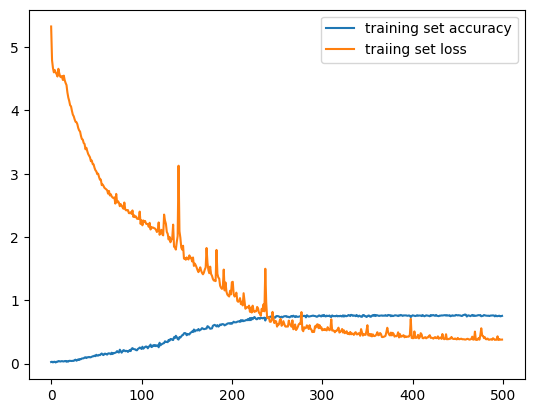

In [26]:
# Plotting akurasi
import matplotlib.pyplot as plt
plt.plot(train.history["accuracy"], label= "training set accuracy")
plt.plot(train.history["loss"], label= "traiing set loss" )
plt.legend()

In [27]:
# model_lstm.predict(['hukumq'])

In [28]:
# model_lstm.save('model_chatbot')

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
import pickle
le_filename = open("label_encoder.pickle", "wb")
pickle.dump(le, le_filename)
le_filename.close()

In [32]:
# import library
import json
from string import punctuation
import random
import pickle
from tensorflow.keras.models import load_model

with open("content.json") as data_file:
    data = json.load(data_file)

model = load_model('bot_model.tf')
le_filename = open("label_encoder.pickle", "rb")
le = pickle.load(le_filename)
le_filename.close()

def preprocess_string(string):
    string = string.lower()
    exclude = set(punctuation)
    string = ''.join(ch for ch in string if ch not in exclude)
    return string

def chat(model):
    print("Anda akan dihubungkan ke bot kami, mohon ditunggu")
    exit = False
    while not exit:
        inp = input("Anda : ")
        inp = preprocess_string(inp)
        prob = model.predict([inp])
        results = le.classes_[prob.argmax()]
        # print(f"results: {le.classes_}")
        print(f"results: {results}")
        if prob.argmax() == 68  and (prob.max() == 0.9908265471458435 or prob.max() == 0.9750761985778809):
            print(random.choice(["Waduh kayaknya pertanyaan anda blom ada di database saya, atau mungkin pertanyan anda kurang saya pahami", "Maaf, sepertinya saya blom belajar tentang itu, , atau mungkin pertanyan anda kurang lengkap"]))
            print(f"Probability: {prob.max()}")
            print(f"prob: {prob.argmax()}")
        else:
            for tg in data['intents']:
                if tg['tag'] == results:
                    responses = tg['responses']
            if results == '':
                exit = True
                print("END CHAT")
            print(f"Bot : {random.choice(responses)}")
            print(f"Probability: {prob.max()}")
            print(f"prob: {prob.argmax()}")


if __name__ == "__main__":
    chat(model)

Anda akan dihubungkan ke bot kami, mohon ditunggu
Anda : p
1/1 [==============================] - 1s 759ms/step
results: 0
Bot : Ada yang perlu diobrolkan?
Probability: 0.9999485015869141
prob: 0
Anda : bagaimana kabarmu?
1/1 [==============================] - 0s 34ms/step
results: 4
Bot : kabar saya baik, bagaimana dengan mu?
Probability: 0.9409822225570679
prob: 4
Anda : apa itu hukumq
1/1 [==============================] - 0s 49ms/step
results: 2
Bot : HukumQ adalah aplikasi yang memberikan jawaban terkait pertanyaan hukum tertulis di Indonesia.
Probability: 0.9999951124191284
prob: 2
Anda : siapa itu bajemin frangklin?
1/1 [==============================] - 0s 32ms/step
results: 1
Bot : Sampai jumpa, semoga harimu menyenangkan!
Probability: 0.5340526700019836
prob: 1
Anda : bye
1/1 [==============================] - 0s 32ms/step
results: 1
Bot : dadah
Probability: 0.9999792575836182
prob: 1
Anda : pasal 194
1/1 [==============================] - 0s 32ms/step
results: 1
Bot : Senang

KeyboardInterrupt: ignored

In [ ]:
print(f"results: {le.classes_}")

In [ ]:
model_lstm.summary()

In [ ]:
# import json
# from string import punctuation
# import random
# import pickle
# import tensorflow as tf

# # Ganti path model TFLite
# model_path = "/content/model/model.tflite"

# # Muat model TFLite
# interpreter = tf.lite.Interpreter(model_path=model_path)
# interpreter.allocate_tensors()

# le_filename = open("label_encoder.pickle", "rb")
# le = pickle.load(le_filename)
# le_filename.close()

# def preprocess_string(string):
#     string = string.lower()
#     exclude = set(punctuation)
#     string = ''.join(ch for ch in string if ch not in exclude)
#     return string

# def chat(interpreter, le, data):
#     print("Anda akan dihubungkan ke bot kami, mohon ditunggu")
#     exit = False
#     while not exit:
#         inp = input("Anda : ")
#         inp = preprocess_string(inp)

#         print(inp)

#         # Proses inferensi dengan model TFLite
#         input_data = tf.convert_to_tensor(padded_sequence, dtype=tf.float32)
#         interpreter.set_tensor(input_details[0]['index'], input_data)
#         interpreter.invoke()
#         prob = interpreter.get_tensor(output_details[0]['index'])

#         results = le.classes_[prob.argmax()]
#         if prob.max() < 0.2:
#             print(random.choice(["Waduh kayaknya pertanyaan anda blom ada di database saya", "Maaf, sepertinya saya blom belajar tentang itu."]))
#             print(f"Probability: {prob.max()}")
#         else:
#             for tg in data['intents']:
#                 if tg['tag'] == results:
#                     responses = tg['responses']
#             if results == '':
#                 exit = True
#                 print("END CHAT")
#             print(f"Bot : {random.choice(responses)}")
#             print(f"Probability: {prob.max()}")

# if __name__ == "__main__":
#     # Dapatkan detail input dan output tensor setelah alokasi tensor
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()

#     # Panggil fungsi chat dengan model TFLite, label encoder, dan data intents
#     chat(interpreter, le, data)

In [ ]:
# !saved_model_cli show --dir /tmp/mobilenet/1 \
#                       --tag_set serve \
#                       --signature_def serving_default

In [ ]:
# # import library
# import json
# from string import punctuation
# import random
# import pickle
# from tensorflow.keras.models import load_model

In [ ]:
# import requests
# response = requests.get("https://solar-virtue-398102-default-rtdb.firebaseio.com/content.json")
# data = response.json()

In [ ]:
# with open("content.json") as data_file:
#      data = json.load(data_file)

In [ ]:
# model = load_model('bot_model.tf')

In [ ]:
# model_path = '/content/model/model.tflite'
# interpreter = tf.lite.Interpreter(model_path=model_path)

# interpreter.allocate_tensors()

# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

In [ ]:
# le_filename = open("label_encoder.pickle", "rb")
# le = pickle.load(le_filename)
# le_filename.close()

In [ ]:
# def preprocess_string(string):
#     string = string.lower()
#     exclude = set(punctuation)
#     string = ''.join(ch for ch in string if ch not in exclude)
#     return string

In [ ]:
# def chat(interpreter):
#     print("Anda akan dihubungkan ke bot kami, mohon ditunggu")
#     exit_chat = False
#     while not exit_chat:
#         inp = input("Anda : ")
#         inp = preprocess_string(inp)

#         # Prepare input tensor
#         input_tensor = interpreter.tensor(interpreter.get_input_details()[0]['index'])
#         input_tensor()[0] = inp

#         # Run inference
#         interpreter.invoke()

#         # Retrieve output tensor
#         output_tensor = interpreter.tensor(interpreter.get_output_details()[0]['index'])
#         prob = output_tensor()[0]

#         results = le.classes_[prob.argmax()]
#         if prob.max() < 0.2:
#             print("HukumQ : Maaf kak, aku ga ngerti")
#         else:
#             for tg in data['intents']:
#                 if tg['tag'] == results:
#                     responses = tg['responses']
#             if results == '':
#                 exit_chat = True
#                 print("END CHAT")
#             print(f"HukumQ : {random.choice(responses)}")

# if __name__ == "__main__":
#     chat(interpreter)

In [ ]:
import numpy as np

interpreter = tf.lite.Interpreter(model_path='/content/model/model.tflite')

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input shape", input_details[0]['shape'])
print("Input Type", input_details[0]['dtype'])
print("Output shape", output_details[0]['shape'])
print("Output Type", output_details[0]['dtype'])

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (1,))
interpreter.resize_tensor_input(output_details[0]['index'], (1, 75))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input shape", input_details[0]['shape'])
print("Input Type", input_details[0]['dtype'])
print("Output shape", output_details[0]['shape'])
print("Output Type", output_details[0]['dtype'])

In [ ]:
inp = [""]
inp = np.array(inp)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], input )
interpreter.invoke()
tflite_model_prediction = interpreter.get_tensor(output_details[0]['index'])
prediction_classes = np.argmax(tflite_model_prediction, axis =1)

In [ ]:
acc = accuracy_score(prediction_classes, test_labels)